# Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models


**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are:

- the turbine type (bigger turbines generally produce more energy),

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and

- the wind speed and wind direction at the location where the wind farm is planned to be build.

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin.

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a _predicted_ "mast" time series covering the 20 years of data found in the meso data. This _predicted_ mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site.

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results.

**Data**

You will have access to two types of time series data:

1. Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2. Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**

The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1.  **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.

    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2.  **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3.  **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4.  **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately.
    **Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5.  **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.

**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

_Risø:_

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)

_Børglum:_

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go.


# 1. Data preprocessing


Imports

In [196]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import missingno as msno 
from scipy.stats import circmean
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import weibull_min
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.pipeline import Pipeline

## Loading dataset.


In [197]:
file_path_risoe = 'Data/Risoe/risoe_m_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']

base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Get the dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

time_minutes = np.array(dataset.variables['time'])
print(f"Time in minutes:\n {time_minutes[:10]} - {time_minutes[-1]}")

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
print(f"Time structured:\n {time[:10]} - {time[-1]}")

Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
Time in minutes:
 [ 0 10 20 30 40 50 60 70 80 90] - 6371011


Time structured:
 ['1995-11-20 16:25:00', '1995-11-20 16:35:00', '1995-11-20 16:45:00', '1995-11-20 16:55:00', '1995-11-20 17:05:00', '1995-11-20 17:15:00', '1995-11-20 17:25:00', '1995-11-20 17:35:00', '1995-11-20 17:45:00', '1995-11-20 17:55:00'] - 2007-12-31 23:56:00


## Mast data


In [198]:
# Converting the dataset to the pandas dataframe
df_mast = pd.DataFrame()
df_mast['time'] = time
for signal in signals_risoe:
    df_mast[signal] = np.array(dataset.variables[signal])
df_mast['time'] = pd.to_datetime(df_mast['time'])
df_mast.set_index('time', inplace=True)
df_mast

ws77   wd77  ws125  wd125
time                                          
1995-11-20 16:25:00  3.36  205.0   3.04  208.0
1995-11-20 16:35:00  3.05  205.0   3.17  214.0
1995-11-20 16:45:00  3.59  204.0   3.64  209.0
1995-11-20 16:55:00  3.87  202.0   3.77  209.0
1995-11-20 17:05:00  4.74  201.0   4.28  212.0
...                   ...    ...    ...    ...
2007-12-31 23:16:00  6.04    0.0    NaN    0.0
2007-12-31 23:26:00  6.97    0.0    NaN    0.0
2007-12-31 23:36:00  8.17    0.0    NaN    0.0
2007-12-31 23:46:00  6.66    0.0    NaN    0.0
2007-12-31 23:56:00  6.72    0.0    NaN    0.0

[628359 rows x 4 columns]

In [199]:
df_mast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628359 entries, 1995-11-20 16:25:00 to 2007-12-31 23:56:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    621607 non-null  float64
 1   wd77    627811 non-null  float64
 2   ws125   541705 non-null  float64
 3   wd125   558830 non-null  float64
dtypes: float64(4)
memory usage: 24.0 MB


Displaying the percentage of missing data for each column.

<Axes: >

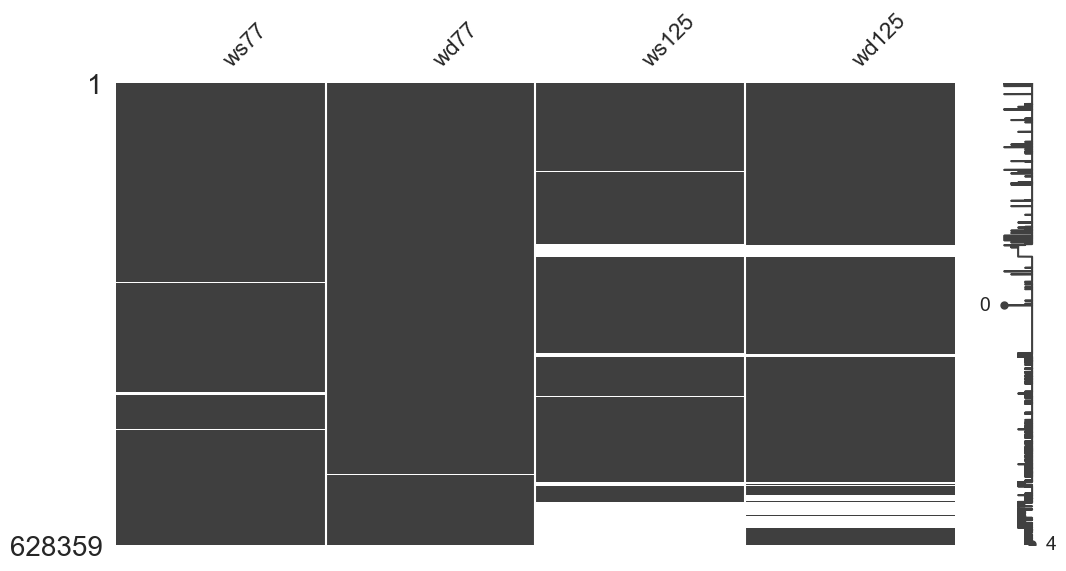

In [200]:
round(df_mast.isnull().sum()/len(df_mast.values)*100, 2)
msno.matrix(df_mast,figsize=(12,6))

Based on the percentage of the missing data we choose the ws / wd at 77 altitude.
We also delete the null values since their share in the database is miniscule.

In [201]:
df_mast = df_mast.drop(columns= ['ws125', 'wd125']).dropna()
df_mast

ws77   wd77
time                            
1995-11-20 16:25:00  3.36  205.0
1995-11-20 16:35:00  3.05  205.0
1995-11-20 16:45:00  3.59  204.0
1995-11-20 16:55:00  3.87  202.0
1995-11-20 17:05:00  4.74  201.0
...                   ...    ...
2007-12-31 23:16:00  6.04    0.0
2007-12-31 23:26:00  6.97    0.0
2007-12-31 23:36:00  8.17    0.0
2007-12-31 23:46:00  6.66    0.0
2007-12-31 23:56:00  6.72    0.0

[621294 rows x 2 columns]

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

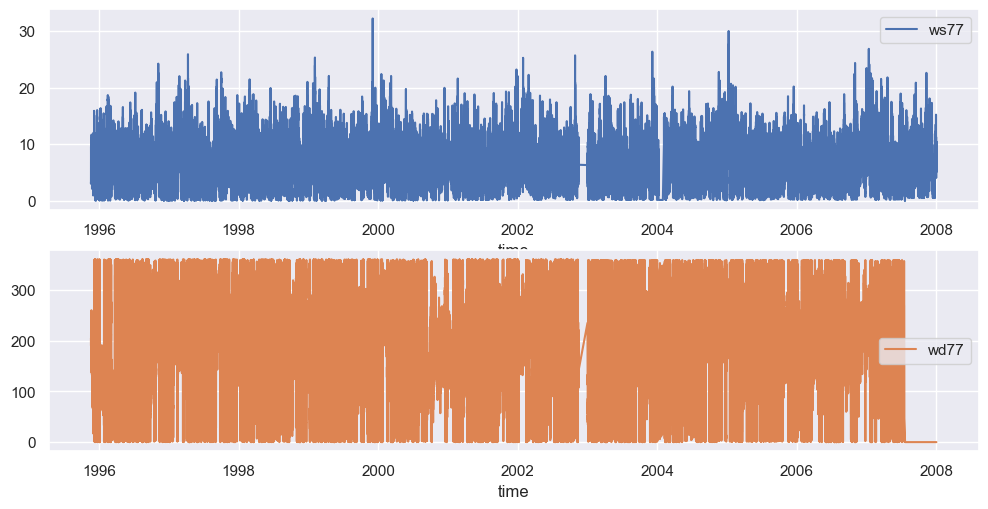

In [202]:
sns.set()
df_mast.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

On the plot there can be seen that last measurements for the wind direction are 0. We will count how many values are 0.


In [203]:
series = df_mast['wd77']
last_non_zero_index = series[series != 0].index[-1]
df_mast = df_mast.loc[:last_non_zero_index]

We decide to remove the last values as we assume that it could be missing data due to broken measurement device or simmilar rather than the valid measurement.


array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

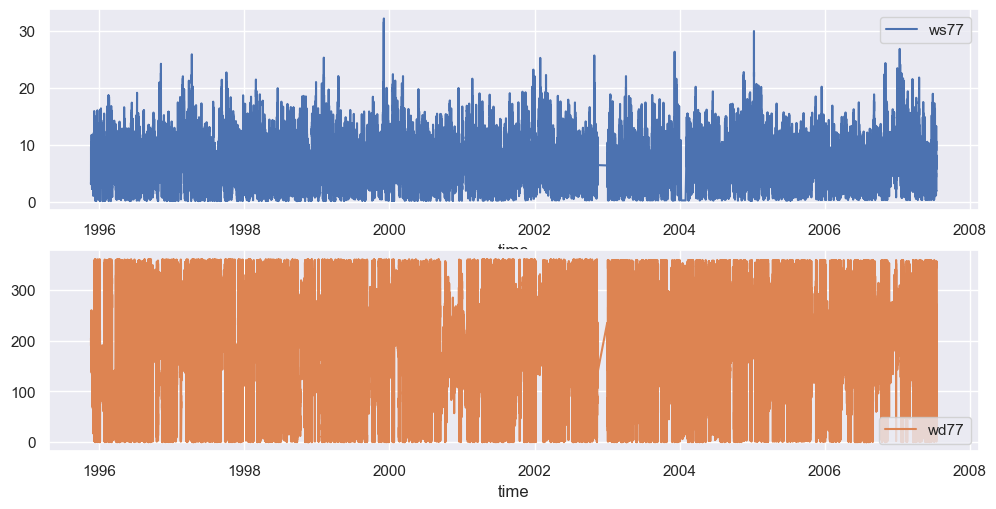

In [204]:
sns.set()
df_mast.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

In [205]:
df_mast

ws77   wd77
time                            
1995-11-20 16:25:00  3.36  205.0
1995-11-20 16:35:00  3.05  205.0
1995-11-20 16:45:00  3.59  204.0
1995-11-20 16:55:00  3.87  202.0
1995-11-20 17:05:00  4.74  201.0
...                   ...    ...
2007-07-15 23:00:00  5.19   75.0
2007-07-15 23:10:00  4.62  106.0
2007-07-15 23:20:00  3.31   86.0
2007-07-15 23:30:00  4.05   14.0
2007-07-15 23:40:00  1.87   47.0

[597852 rows x 2 columns]

The nature of the wind direction data makes it unneccessary to check for outliers since wind can blow from 0 to 360 degrees. That is why we check for outliers in the wind speed.


Amount of outliers: 9025


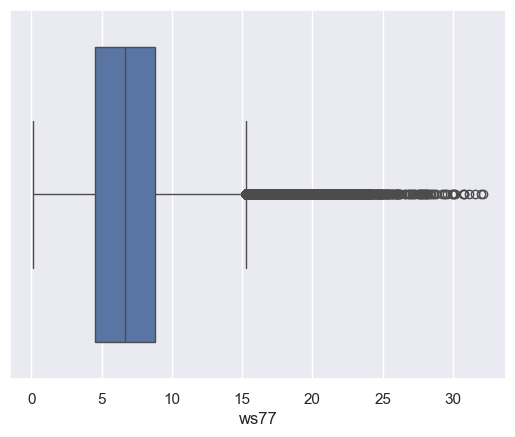

In [206]:
sns.boxplot(x=df_mast['ws77'])
df_mast['ws77'].describe()
q1 = df_mast['ws77'].quantile(0.25)
q3 = df_mast['ws77'].quantile(0.75)
iqr = q3 - q1

# calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]
print('Amount of outliers:', df_mast['ws77'].apply(lambda x: x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr)).sum())

The information above shows that there are 9025 outliers. We decide to keep them since the wind can vary a lot in its speed and that information might be important to know.


Plotting a histogram for the distribution of the data.


array([[<Axes: title={'center': 'ws77'}>,
        <Axes: title={'center': 'wd77'}>]], dtype=object)

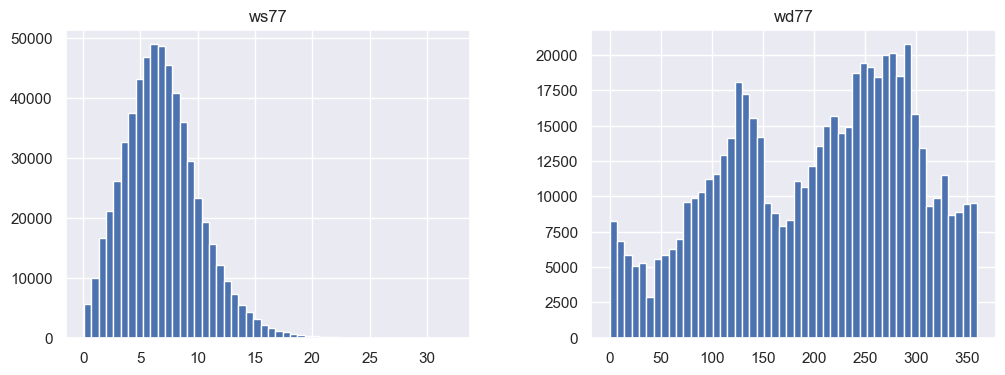

In [207]:
df_mast.hist(bins=50, figsize=(12,4))

The wind speed histogram follows a Wibull distribution closely.


## Meso data


In [208]:
# Load the meso data
file_path_risoe_meso = 'Data/Risoe/meso_Risoe.csv'
df_meso = pd.read_csv(file_path_risoe_meso)
for var_name in df_meso.columns:
    print(var_name)

TIMESTAMP
HGT
RHO060
RHO080
RHO100
RHO120
RHO140
RHO160
RHO180
RHO200
RHO220
TC060
TC080
TC100
TC120
TC140
TC160
TC180
TC200
TC220
WSP060
WSP080
WSP100
WSP120
WSP140
WSP160
WSP180
WSP200
WSP220
WDIR060
WDIR080
WDIR100
WDIR120
WDIR140
WDIR160
WDIR180
WDIR200
WDIR220
PRS060
PRS080
PRS100
PRS120
PRS140
PRS160
PRS180
PRS200
PRS220
TK060
TK080
TK100
TK120
TK140
TK160
TK180
TK200
TK220
TKE_PBL060
TKE_PBL080
TKE_PBL100
TKE_PBL120
TKE_PBL140
TKE_PBL160
TKE_PBL180
TKE_PBL200
TKE_PBL220
RH060
RH080
RH100
RH120
RH140
RH160
RH180
RH200
RH220


The mast-signals which we chose are from the height of the 77m. The closes meso-signals are from the height of 80m that is why we will continue only with the features relevant to this height.


In [209]:
df_meso = df_meso[['TIMESTAMP', 'WSP080', 'WDIR080']]
df_meso['TIMESTAMP'] = pd.to_datetime(df_meso['TIMESTAMP'])
# We will set the time to be an index as we did with the mast data
df_meso.set_index('TIMESTAMP', inplace=True)
# By looking at the data we noticed that it is not sorted 
df_meso.sort_index(inplace=True)
df_meso


WSP080  WDIR080
TIMESTAMP                           
2000-01-01 07:00:00    5.83   209.09
2000-01-01 08:00:00    6.13   204.21
2000-01-01 09:00:00    6.69   204.75
2000-01-01 10:00:00    6.37   211.50
2000-01-01 11:00:00    6.20   217.37
...                     ...      ...
2023-06-11 02:00:00    8.28    86.03
2023-06-11 03:00:00    8.16    87.84
2023-06-11 04:00:00    7.61    89.99
2023-06-11 05:00:00    6.78    94.44
2023-06-11 06:00:00    6.49    98.74

[204288 rows x 2 columns]

In [210]:
df_meso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204288 entries, 2000-01-01 07:00:00 to 2023-06-11 06:00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   WSP080   204288 non-null  float64
 1   WDIR080  204288 non-null  float64
dtypes: float64(2)
memory usage: 4.7 MB


## Time convertion


Converting from DK time to UTC


In [211]:
def get_dk_offset(dt):
    if dt.month < 3 or dt.month > 10:
        return pd.Timedelta(hours=1)  # Standard time offset (UTC+1)
    elif dt.month == 3:
        last_sunday = max(dt.replace(day=1), dt - pd.Timedelta(days=6))
        if dt == last_sunday:
            return pd.Timedelta(hours=2)  # Daylight saving time starts
    elif dt.month == 10:
        last_sunday = max(dt.replace(day=1), dt - pd.Timedelta(days=6))
        if dt == last_sunday:
            return pd.Timedelta(hours=1)  # Daylight saving time ends
    return pd.Timedelta(hours=2)  # Daylight saving time offset (UTC+2)

# Convert 'time' column to datetime
df_mast.index = pd.to_datetime(df_mast.index)

# Calculate the Danish time zone offset for each timestamp in the index
dk_offsets = df_mast.index.to_series().apply(get_dk_offset)

# Convert the Danish time to UTC time by subtracting the offset
df_mast.index = df_mast.index - dk_offsets

In [212]:
df_mast

ws77   wd77
time                            
1995-11-20 15:25:00  3.36  205.0
1995-11-20 15:35:00  3.05  205.0
1995-11-20 15:45:00  3.59  204.0
1995-11-20 15:55:00  3.87  202.0
1995-11-20 16:05:00  4.74  201.0
...                   ...    ...
2007-07-15 21:00:00  5.19   75.0
2007-07-15 21:10:00  4.62  106.0
2007-07-15 21:20:00  3.31   86.0
2007-07-15 21:30:00  4.05   14.0
2007-07-15 21:40:00  1.87   47.0

[597852 rows x 2 columns]

## Data resampling


In [213]:
# Resample the data to 1 hour frequency
resampled_data = pd.DataFrame()
resampled_data['ws77'] = df_mast['ws77'].resample('1H').mean()

print(resampled_data)

                         ws77
time                         
1995-11-20 15:00:00  3.467500
1995-11-20 16:00:00  5.216667
1995-11-20 17:00:00  6.288333
1995-11-20 18:00:00  7.316667
1995-11-20 19:00:00  7.943333
...                       ...
2007-07-15 17:00:00  2.645000
2007-07-15 18:00:00  3.058333
2007-07-15 19:00:00  3.471667
2007-07-15 20:00:00  3.881667
2007-07-15 21:00:00  3.808000

[102127 rows x 1 columns]


To handle the circular data which is the data of the wind direction we need to consider few additional steps to keep the circular nature. First we will convert the data to radias because most of the trigonometric functions in Python operate on radians. Secondly, we will perform the resampling using circular mean. At last we will convert the radians back to degrees.
Handling circular data could be also implemented using sine and cosine functions.

In [214]:
df_mast['wd77_radians'] = np.deg2rad(df_mast['wd77'])

# Resample the data and apply circular mean
resampled_data_d = df_mast['wd77_radians'].resample('1H').apply(lambda x: circmean(x, high=np.pi*2, low=0))

# Convert resampled wd77 back to degrees
resampled_data['wd77'] = np.rad2deg(resampled_data_d)

resampled_data

ws77        wd77
time                                     
1995-11-20 15:00:00  3.467500  204.000076
1995-11-20 16:00:00  5.216667  201.003152
1995-11-20 17:00:00  6.288333  202.833228
1995-11-20 18:00:00  7.316667  200.166908
1995-11-20 19:00:00  7.943333  197.500508
...                       ...         ...
2007-07-15 17:00:00  2.645000  336.563238
2007-07-15 18:00:00  3.058333    2.703532
2007-07-15 19:00:00  3.471667   24.828543
2007-07-15 20:00:00  3.881667   51.781996
2007-07-15 21:00:00  3.808000   66.372530

[102127 rows x 2 columns]

## Selection of the overlapping time


Overlapping period


In [215]:
print('The mast starting index: ', resampled_data.index[0])
print('The mast ending index: ', resampled_data.index[-1])
print('The meso starting index: ', df_meso.index[0])
print('The meso ending index: ', df_meso.index[-1])


The mast starting index:  1995-11-20 15:00:00
The mast ending index:  2007-07-15 21:00:00
The meso starting index:  2000-01-01 07:00:00
The meso ending index:  2023-06-11 06:00:00


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

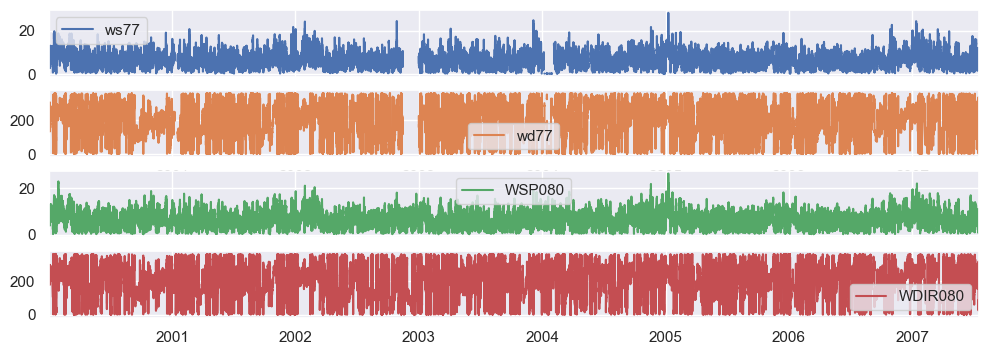

In [216]:
# Slice the meso data until the last index of mast (2007-07-15)
df_meso = df_meso[:str(resampled_data.index[-1])]
# Slice the mast data before the first index of meso (2000-01-01)
resampled_data = resampled_data[str(df_meso.index[0]):]

joined_df = pd.concat([resampled_data, df_meso[['WSP080', 'WDIR080']]], axis=1)
joined_df.head()
joined_df.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

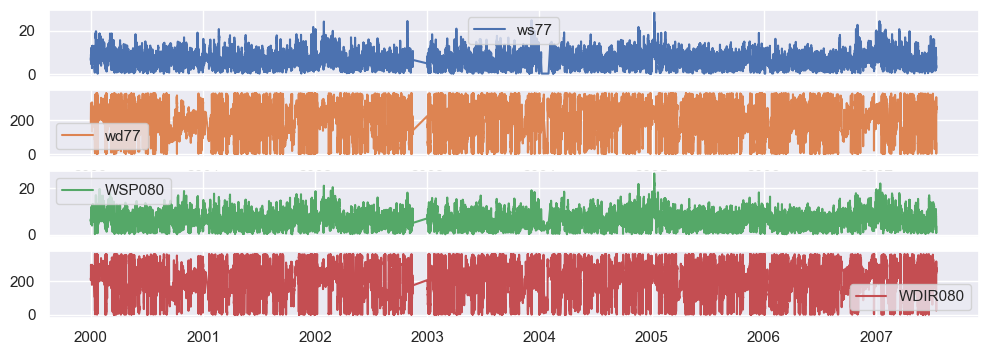

In [217]:
joined_df.dropna(inplace=True)
joined_df.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

## Time features extraction


Time is set to be an index in the dataset.
However, time can be a impactful as it could provide:

- Long-term changes,
- Seasonal variations,
- Daily fluctiations

We decide to extract features from timestamp.


In [218]:
joined_df['Hour'] = joined_df.index.hour
joined_df['Day'] = joined_df.index.day
joined_df['Week'] = joined_df.index.isocalendar().week
joined_df['Month'] = joined_df.index.month
joined_df['Year'] = joined_df.index.year

def get_season(month, day):
    if (month == 3 and day >= 21) or (month == 4) or (month == 5) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day < 23):
        return 'Summer'
    elif (month == 9 and day >= 23) or (month == 10) or (month == 11) or (month == 12 and day < 21):
        return 'Fall'
    else:
        return 'Winter'

joined_df['Season'] = joined_df.apply(lambda row: get_season(row['Month'], row['Day']), axis=1)

season_encoding = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}
joined_df['Season_Encoded'] = joined_df['Season'].map(season_encoding)
joined_df.drop(columns='Season', inplace=True)

joined_df.tail()

ws77        wd77  WSP080  WDIR080  Hour  Day  Week  \
2007-07-15 17:00:00  2.645000  336.563238    1.65   277.14    17   15    28   
2007-07-15 18:00:00  3.058333    2.703532    0.61   315.45    18   15    28   
2007-07-15 19:00:00  3.471667   24.828543    2.99    25.40    19   15    28   
2007-07-15 20:00:00  3.881667   51.781996    4.51    38.72    20   15    28   
2007-07-15 21:00:00  3.808000   66.372530    3.53    89.16    21   15    28   

                     Month  Year  Season_Encoded  
2007-07-15 17:00:00      7  2007               2  
2007-07-15 18:00:00      7  2007               2  
2007-07-15 19:00:00      7  2007               2  
2007-07-15 20:00:00      7  2007               2  
2007-07-15 21:00:00      7  2007               2

We want to plot features correlations to see if we need all extracted features.
We will not include target variables.


In [219]:
def create_corr_matrix(cr):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cr, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    return cr

In [220]:
def print_sum_of_corr(cr):
    correlation_matrix = cr
    sum_of_correlations = {}
    for feature in correlation_matrix.columns:
        sum_of_correlations[feature] = correlation_matrix[feature].abs().drop(feature).sum()
    sorted_sum_of_correlations = sorted(sum_of_correlations.items(), key=lambda x: x[1], reverse=True)
    print("Sum of correlations for each feature (sorted):")
    for feature, sum_corr in sorted_sum_of_correlations:
        display(f"{feature}: {sum_corr}")

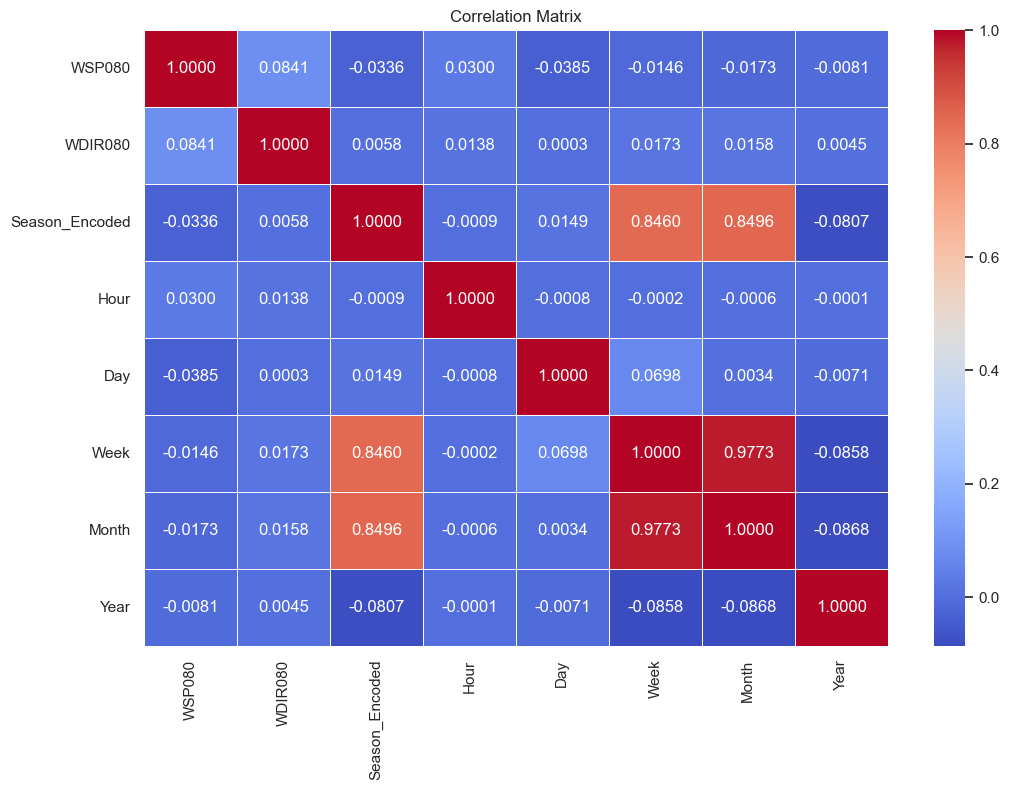

Sum of correlations for each feature (sorted):


'Week: 2.0110190021943324'

'Month: 1.9508699509824732'

'Season_Encoded: 1.8314819368103548'

'Year: 0.273234380349096'

'WSP080: 0.22614995531569418'

'WDIR080: 0.14162297421730805'

'Day: 0.13480820919804964'

'Hour: 0.046452117071004086'

In [221]:
correlation_matrix = joined_df[['WSP080', 'WDIR080', 'Season_Encoded', 'Hour', 'Day', 'Week', 'Month', 'Year']].corr()
create_corr_matrix(correlation_matrix)
print_sum_of_corr(correlation_matrix)

Based on correlation matrix it can be seen that week and month have the biggest correlation.
We calculate the sum of correlation for each feature and decide to remove Week feature.


In [222]:
joined_df.drop(columns=["Week"], axis=1, inplace=True)

After dropping this column we can create correlation matrix again and repeat the process.


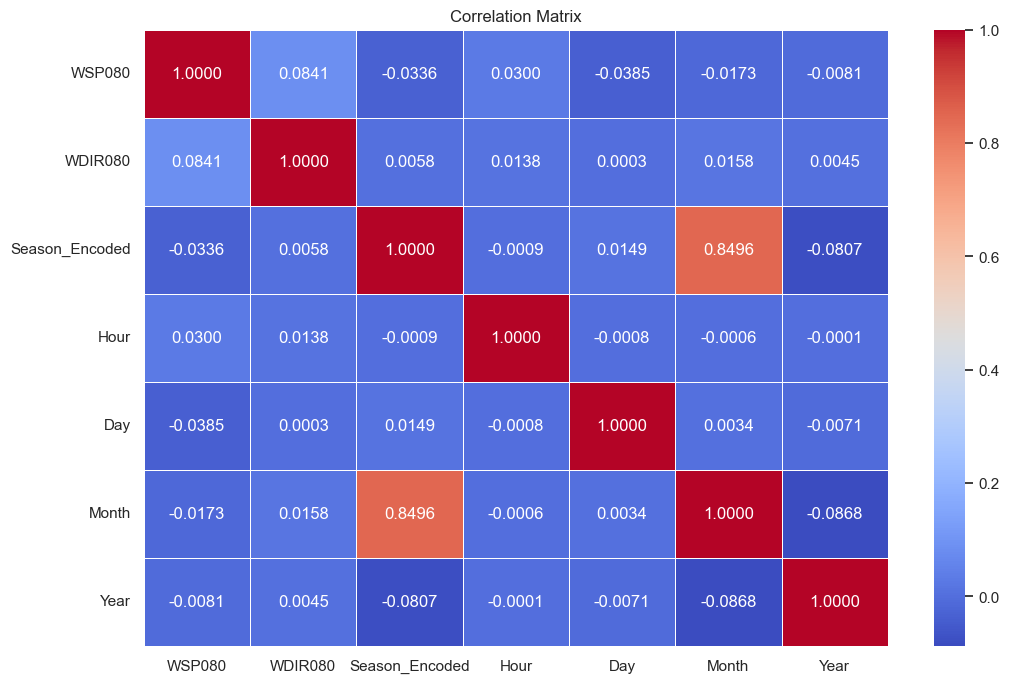

Sum of correlations for each feature (sorted):


'Season_Encoded: 0.9854558489254296'

'Month: 0.9735834561225626'

'WSP080: 0.21152798302384643'

'Year: 0.1874409602866441'

'WDIR080: 0.124338822285506'

'Day: 0.06496861763910515'

'Hour: 0.04628483346655329'

In [223]:
correlation_matrix = joined_df[['WSP080', 'WDIR080', 'Season_Encoded', 'Hour', 'Day', 'Month', 'Year']].corr()
correlation_matrix = create_corr_matrix(correlation_matrix)
print_sum_of_corr(correlation_matrix)

We decide to leave both season and month as can provide different long-term patterns.


We decide to check for the VIF (Variance Inflation Factor) to measure multicollinearity in the set of our predictor variables.

In [224]:
X = joined_df[['WSP080', 'WDIR080', 'Season_Encoded', 'Hour', 'Day', 'Month', 'Year']]
X['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Predictor"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
        Predictor            VIF
0          WSP080       1.011098
1         WDIR080       1.007741
2  Season_Encoded       3.602380
3            Hour       1.001032
4             Day       1.002009
5           Month       3.603303
6            Year       1.007969
7       intercept  829109.601204


VIF values printed in the table above are low which indicates that non of our predictor variables are highly correlated with other predictor variables.

## Data scaling


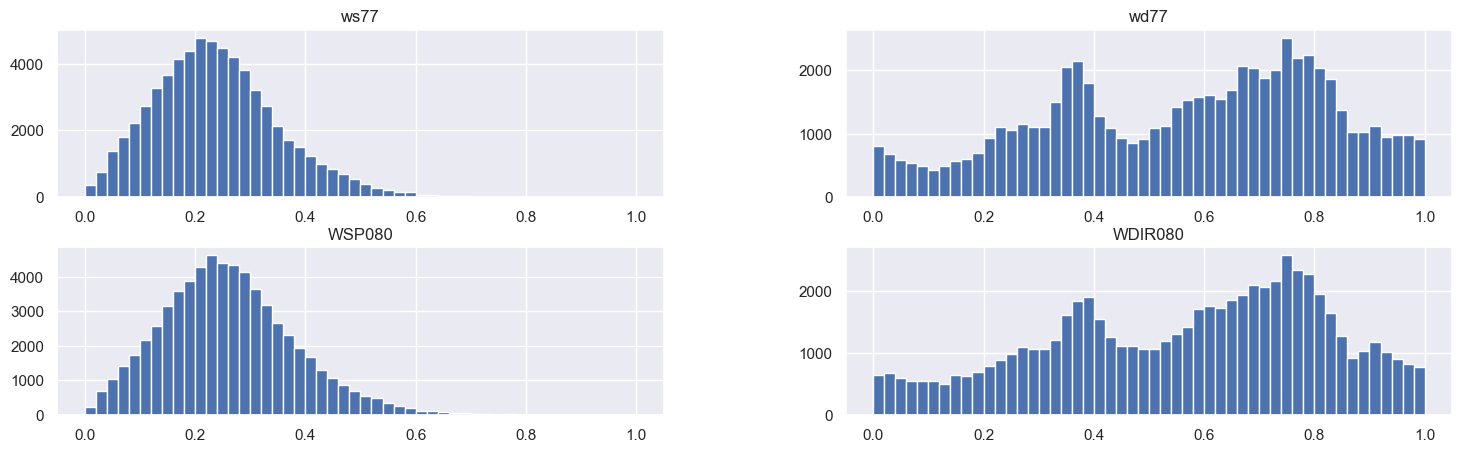

In [225]:
# Select the columns to be scaled (excluding time-related features)
columns_to_scale = ['ws77', 'wd77', 'WSP080', 'WDIR080']

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(joined_df[columns_to_scale])

scaled_df = pd.DataFrame(scaled_features, columns=columns_to_scale, index=joined_df.index)

scaled_df.hist(bins=50, figsize=(18,5))

# Concatenate the scaled features with the non-scaled time-related features
scaled_df = pd.concat([scaled_df, joined_df[['Hour', 'Day', 'Month', 'Year', 'Season_Encoded']]], axis=1)

# 2. Exploratory analysis


We would like to see the visualization of the relationship between each pair of variables in a dataset.


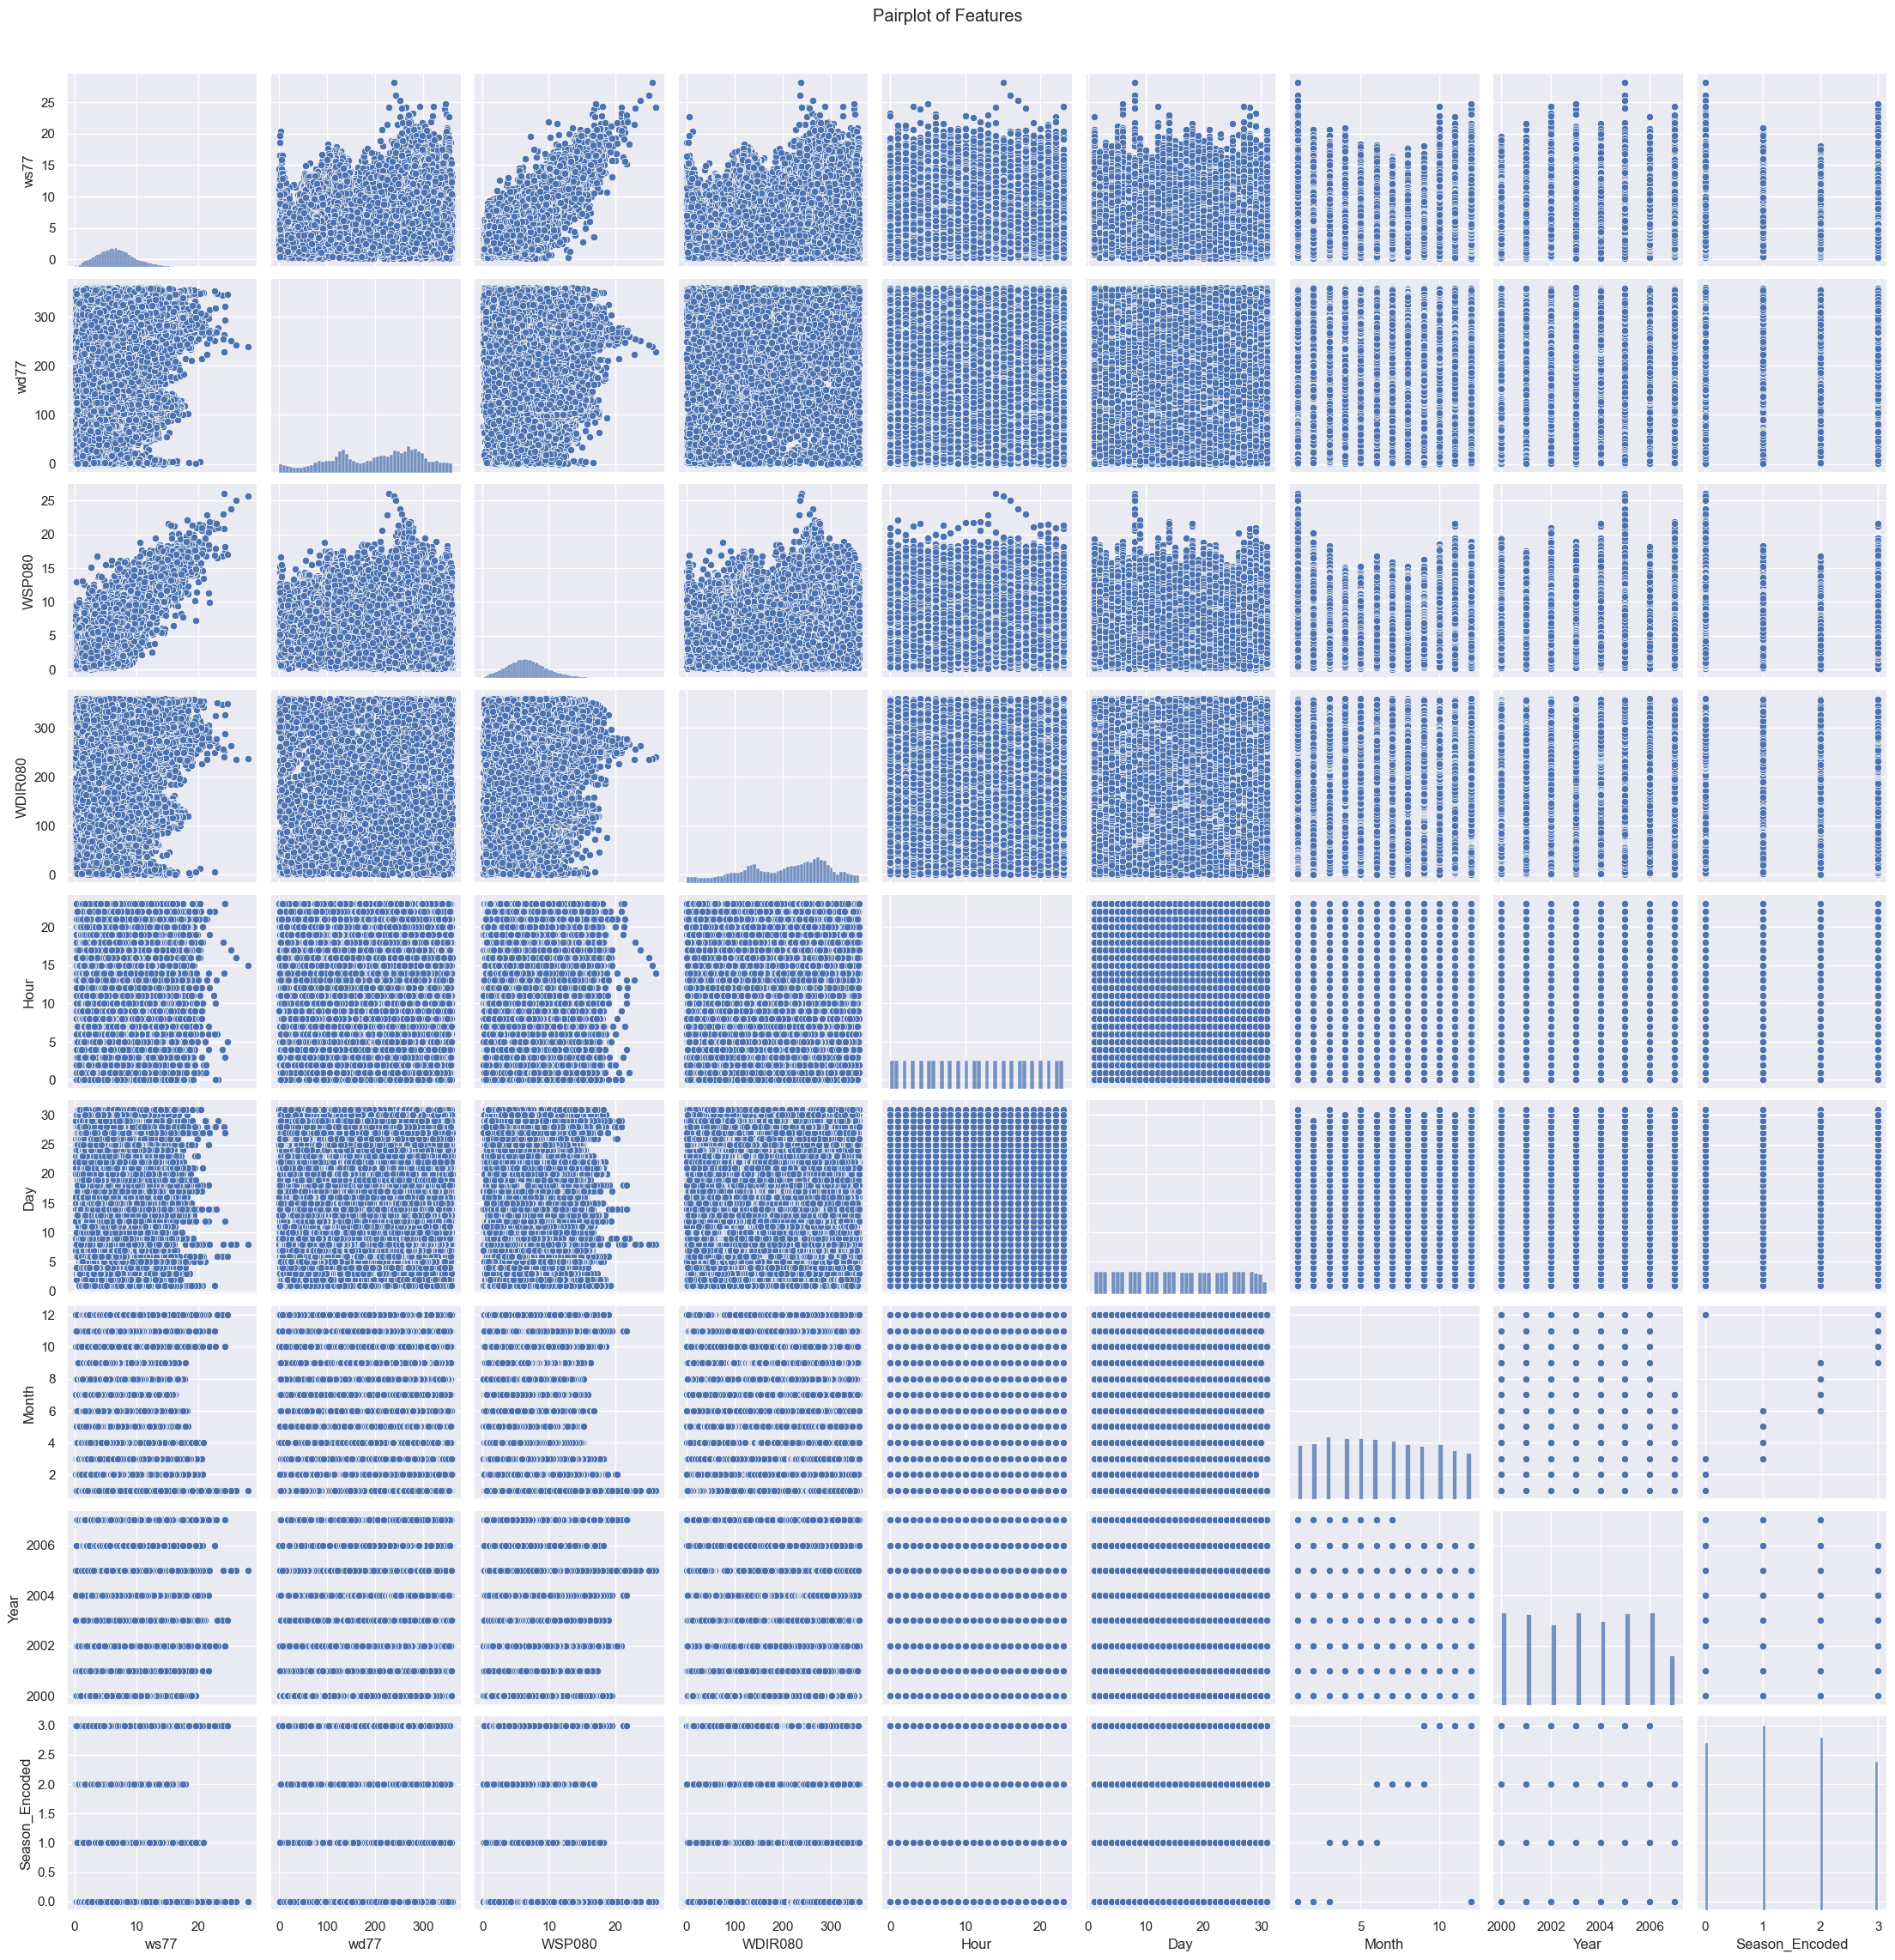

In [226]:
columns = ['ws77', 'wd77', 'WSP080', 'WDIR080', 'Hour', 'Day', 'Month', 'Year', 'Season_Encoded']

sns.pairplot(data=joined_df[columns])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [227]:
exploratory_df = joined_df[['ws77', 'wd77', 'WSP080', 'WDIR080']]

array([[<Axes: title={'center': 'ws77'}>,
        <Axes: title={'center': 'wd77'}>],
       [<Axes: title={'center': 'WSP080'}>,
        <Axes: title={'center': 'WDIR080'}>]], dtype=object)

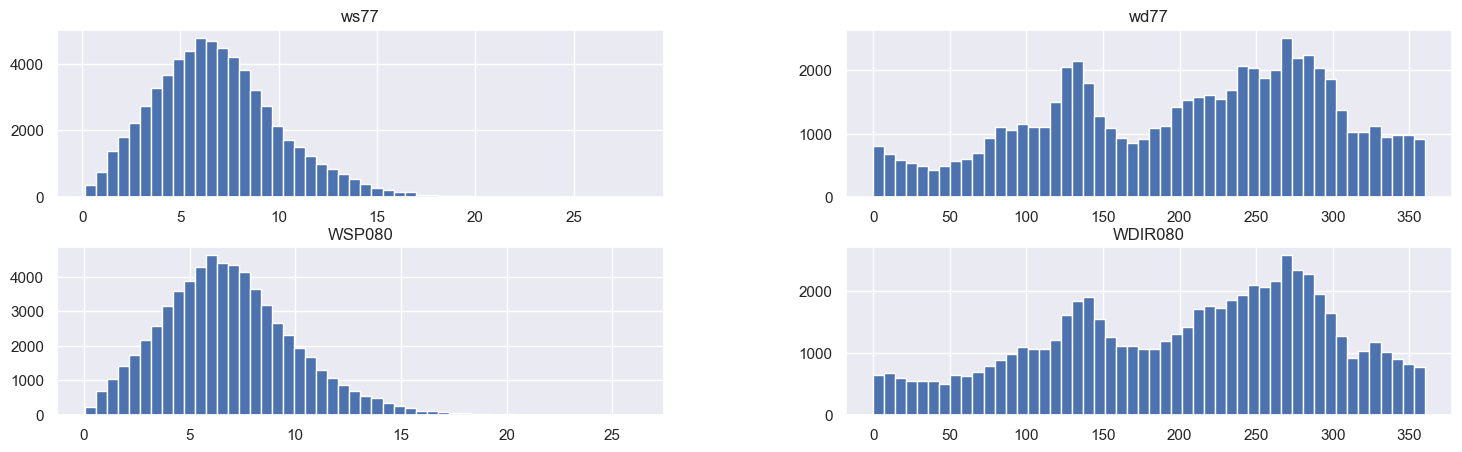

In [228]:
exploratory_df.hist(bins=50, figsize=(18,5))

Fitting Weibull distribution to the mast data, presampled mast and meso data. We decided to do it so on the unscaled data since the Weibull distribution shape and scale parameters are not affected by linear transformations of the data.


In [229]:
def fit_weibull(data):
    params = weibull_min.fit(data, floc=0) # Use floc=0 to fix location parameter at 0 (standard Weibull)
    return params

mast_params = fit_weibull(df_mast['ws77'])
resampled_mast = fit_weibull(exploratory_df['ws77'])
resampled_meso = fit_weibull(exploratory_df['WSP080'])

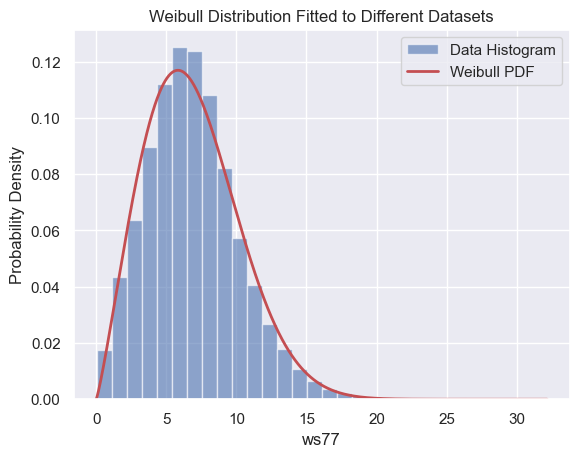

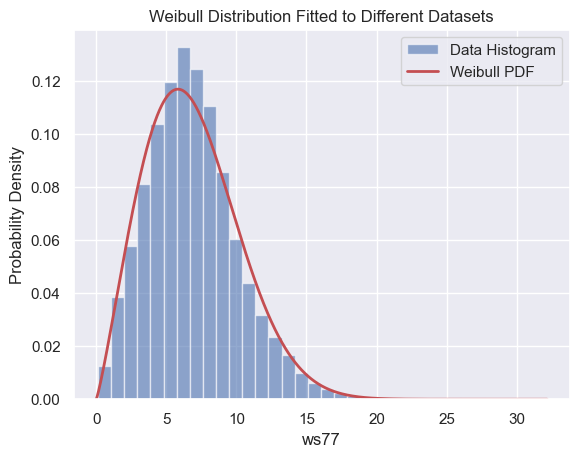

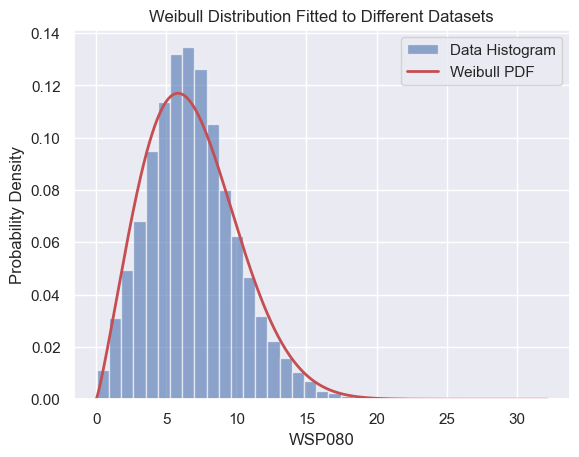

Mast Parameters (shape, loc, scale): (2.1691742799788436, 0, 7.753225747832017)
Resampled Parameters (shape, loc, scale): (2.232875227511676, 0, 7.738952532827906)
Meso Parameters (shape, loc, scale): (2.31562472350875, 0, 7.707106525719837)


In [230]:
# Define a range of x values for the PDF plot
x = np.linspace(0, max(df_mast['ws77']), 1000)

datasets = [df_mast['ws77'], exploratory_df['ws77'], exploratory_df['WSP080']]

labels = ['ws77', 'ws77', 'WSP080']
for data, label in zip(datasets, labels):
    plt.hist(data, bins=30, density=True, alpha=0.6, label='Data Histogram')
    plt.plot(x, weibull_min.pdf(x, *mast_params), 'r-', lw=2, label='Weibull PDF')
    plt.xlabel(label)
    plt.ylabel('Probability Density')
    plt.title('Weibull Distribution Fitted to Different Datasets')
    plt.legend()
    plt.grid(True)
    plt.show()

print("Mast Parameters (shape, loc, scale):", mast_params)
print("Resampled Parameters (shape, loc, scale):", resampled_mast)
print("Meso Parameters (shape, loc, scale):", resampled_meso)

In [231]:
t_stat, p_value = ttest_ind(mast_params[2], resampled_meso[2], nan_policy='omit')

if p_value < 0.05:
    print("The difference in shape parameter (k) is statistically significant.")
else:
    print("The difference in shape parameter (k) is not statistically significant.")

The difference in shape parameter (k) is not statistically significant.


c:\Users\IZO21\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


The mast dataset has a Weibull distribution with a shape parameter of approximately 2.17, meaning a right-skewed moderately peaked distribution, and scale parameter of approximately 7.75 - around which the distribution is centered. This is the biggest scale parameter of shown distributions, which means this distribution has the broadest range of wind speeds. However, the difference between mast and mesto scale parameter is not significant.

The resampled dataset shows a Weibull distribution with a slightly higher shape of 2.23, meaning a slightly more peaked distribution compared to the mast dataset. The scale parameter is 7.74, which is very similar to mast dataset.

The Meso dataset has the highest shape value of 2.32, suggesting a more sharply peaked distribution compared to the other datasets. The scale parameter is 7.71, which is also very similar to mast and resampled mast dataset.


# 3. Model Development


Based on our exploratory analysis of the data, we observed that the relationships between our independent variables (x) and dependent variable (y) exhibit polynomial but closer to linear characteristics. Nevertheless, the correlations between the variables are not statistically significant.

Our dataset includes a limited number of independent variables, seven in particular. Drawing on domain knowledge, we determined that all selected features were necessary to develop our model.

Furthermore, we evaluated the model performance, in subpoint 3.1 below, using the coefficient of determination (r^2) of Linear Regression model. The results indicate that the model shows no signs of overfitting, as confirmed by the r^2 results.

Given these observations, we decided not to use regularization models such as Lasso or Ridge regression. These models are intended to solve problems that are not common in our particular use case, so we decided to focus on alternative modeling strategies that are more consistent with our data characteristics and modeling goals.


## 3.0 Splitting data for model training and final prediction

In [232]:
split_index = round(0.8 * len(scaled_df))
traintest_df = scaled_df.iloc[:split_index] # will be used for Model development and evaluation
val_df = scaled_df.iloc[split_index:] # will be used for final data prediction analysis

## 3.1 Linear regression model


### 3.1.0 Splitting data


In [233]:
def split_data(X, y, test_size=0.2, random_state=42):
    """Split data into train and test sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=traintest_df[['Season_Encoded']])
    return X_train, X_test, y_train, y_test

features = ['WSP080', 'WDIR080', 'Hour', 'Day', 'Month', 'Year', 'Season_Encoded']
target_variables = ['ws77', 'wd77']

### 3.1.1 Model development


In [234]:
models = {}
train_predictions = {}
test_predictions = {}
actual_values = {}

for target in target_variables:
    print(f"Predicting Target Variable: {target}")
    
    X_train, X_test, y_train, y_test = split_data(traintest_df[features], traintest_df[target])
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)

    models[target] = model
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_predictions[target] = train_pred
    test_predictions[target] = test_pred
    actual_values[target] = {'train': y_train, 'test': y_test}

Predicting Target Variable: ws77
Predicting Target Variable: wd77


### 3.1.2 Model evaluation


In [235]:
train_metrics = {}
test_metrics = {}

for target in target_variables:

    train_mse = mean_squared_error(actual_values[target]['train'], train_predictions[target])
    train_r2 = r2_score(actual_values[target]['train'], train_predictions[target])
    test_mse = mean_squared_error(actual_values[target]['test'], test_predictions[target])
    test_r2 = r2_score(actual_values[target]['test'], test_predictions[target])
    
    train_metrics[target] = {'MSE': train_mse, 'R^2': train_r2}
    test_metrics[target] = {'MSE': test_mse, 'R^2': test_r2}
    
    print(f"Target Variable: {target}")
    print(f"Train MSE: {train_mse:.4f}, Train R^2: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R^2: {test_r2:.4f}")
    print("--------------------")

Target Variable: ws77
Train MSE: 0.0036, Train R^2: 0.7243
Test MSE: 0.0036, Test R^2: 0.7240
--------------------
Target Variable: wd77
Train MSE: 0.0307, Train R^2: 0.5228
Test MSE: 0.0308, Test R^2: 0.5282
--------------------


As written above, there is no significant difference between the train and the r^2 test, so the model does not overfit. A score > 0.7 for the ws77 variable means that the linear regression did a good job of predicting wind speed.
However, the result of ~0.52 for wind direction is much worse, as expected from the exploratory analysis of the data. Perhaps polynomial regression will give better results.


Intercept for ws77: 0.33609600450998317


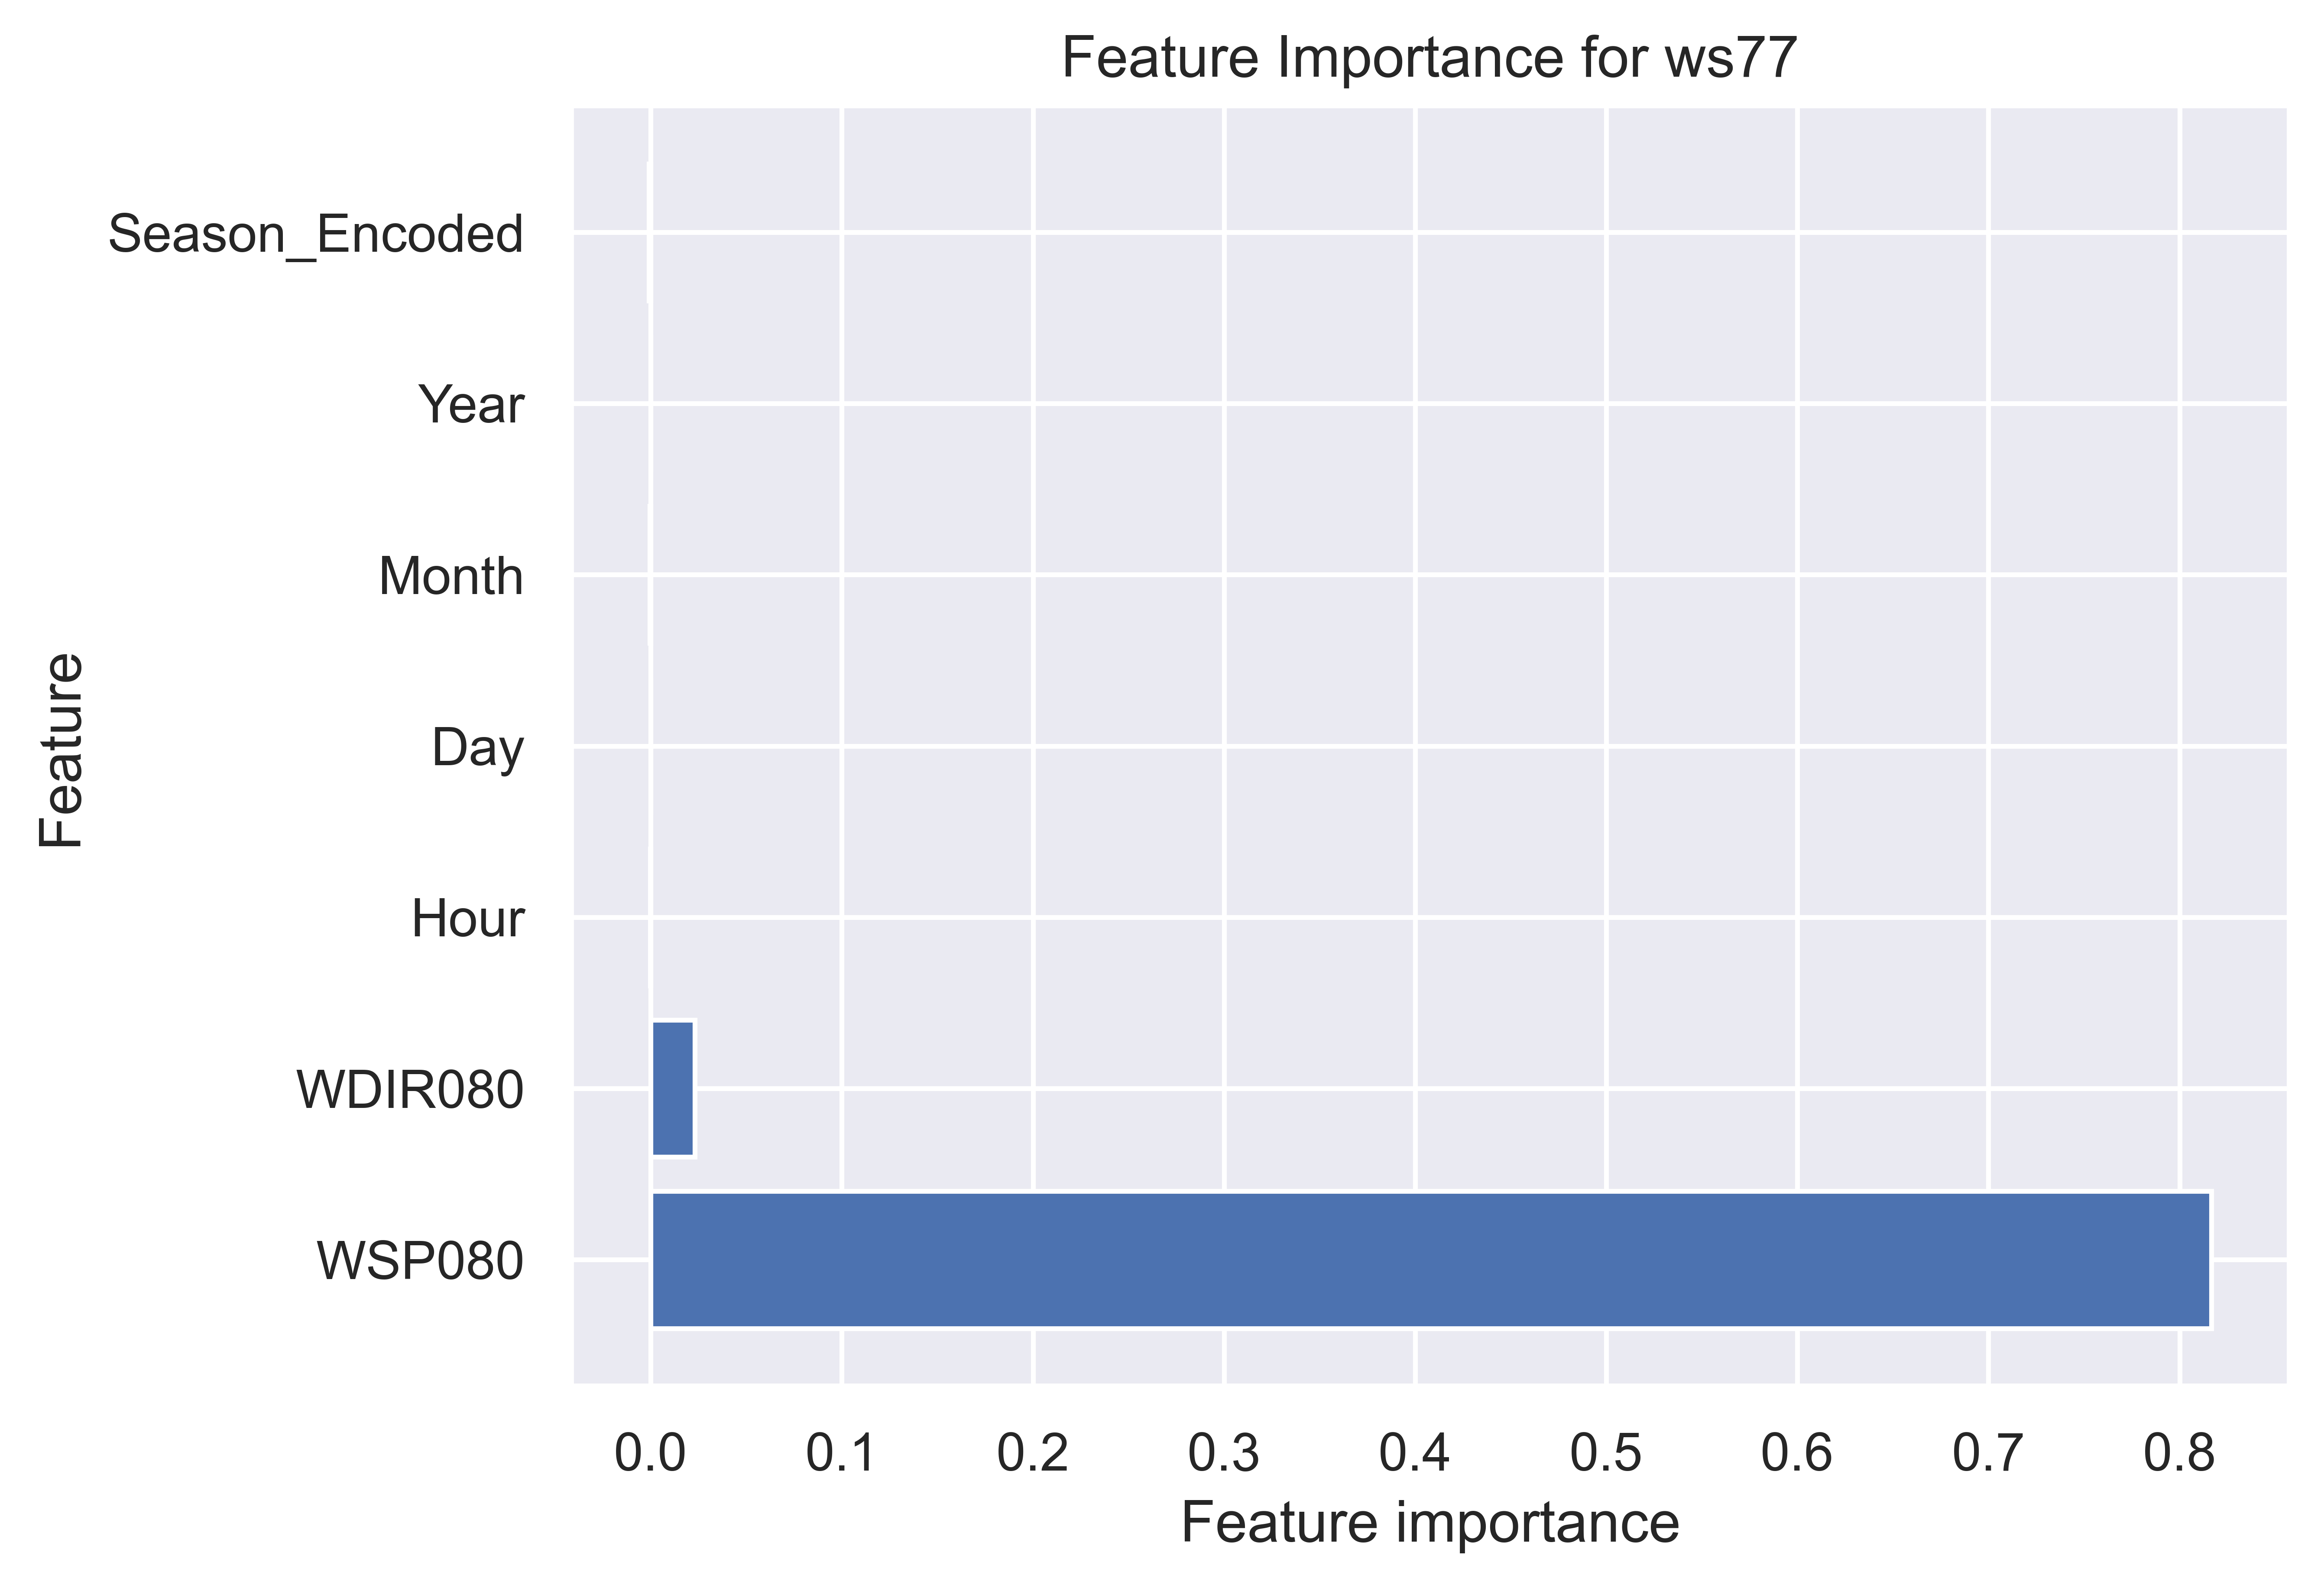

[ 8.16739454e-01  2.29724713e-02 -1.91130539e-04  3.01928679e-05
 -4.21381346e-04 -1.57993493e-04 -9.51769171e-04]
Intercept for wd77: 1.1923977182883396


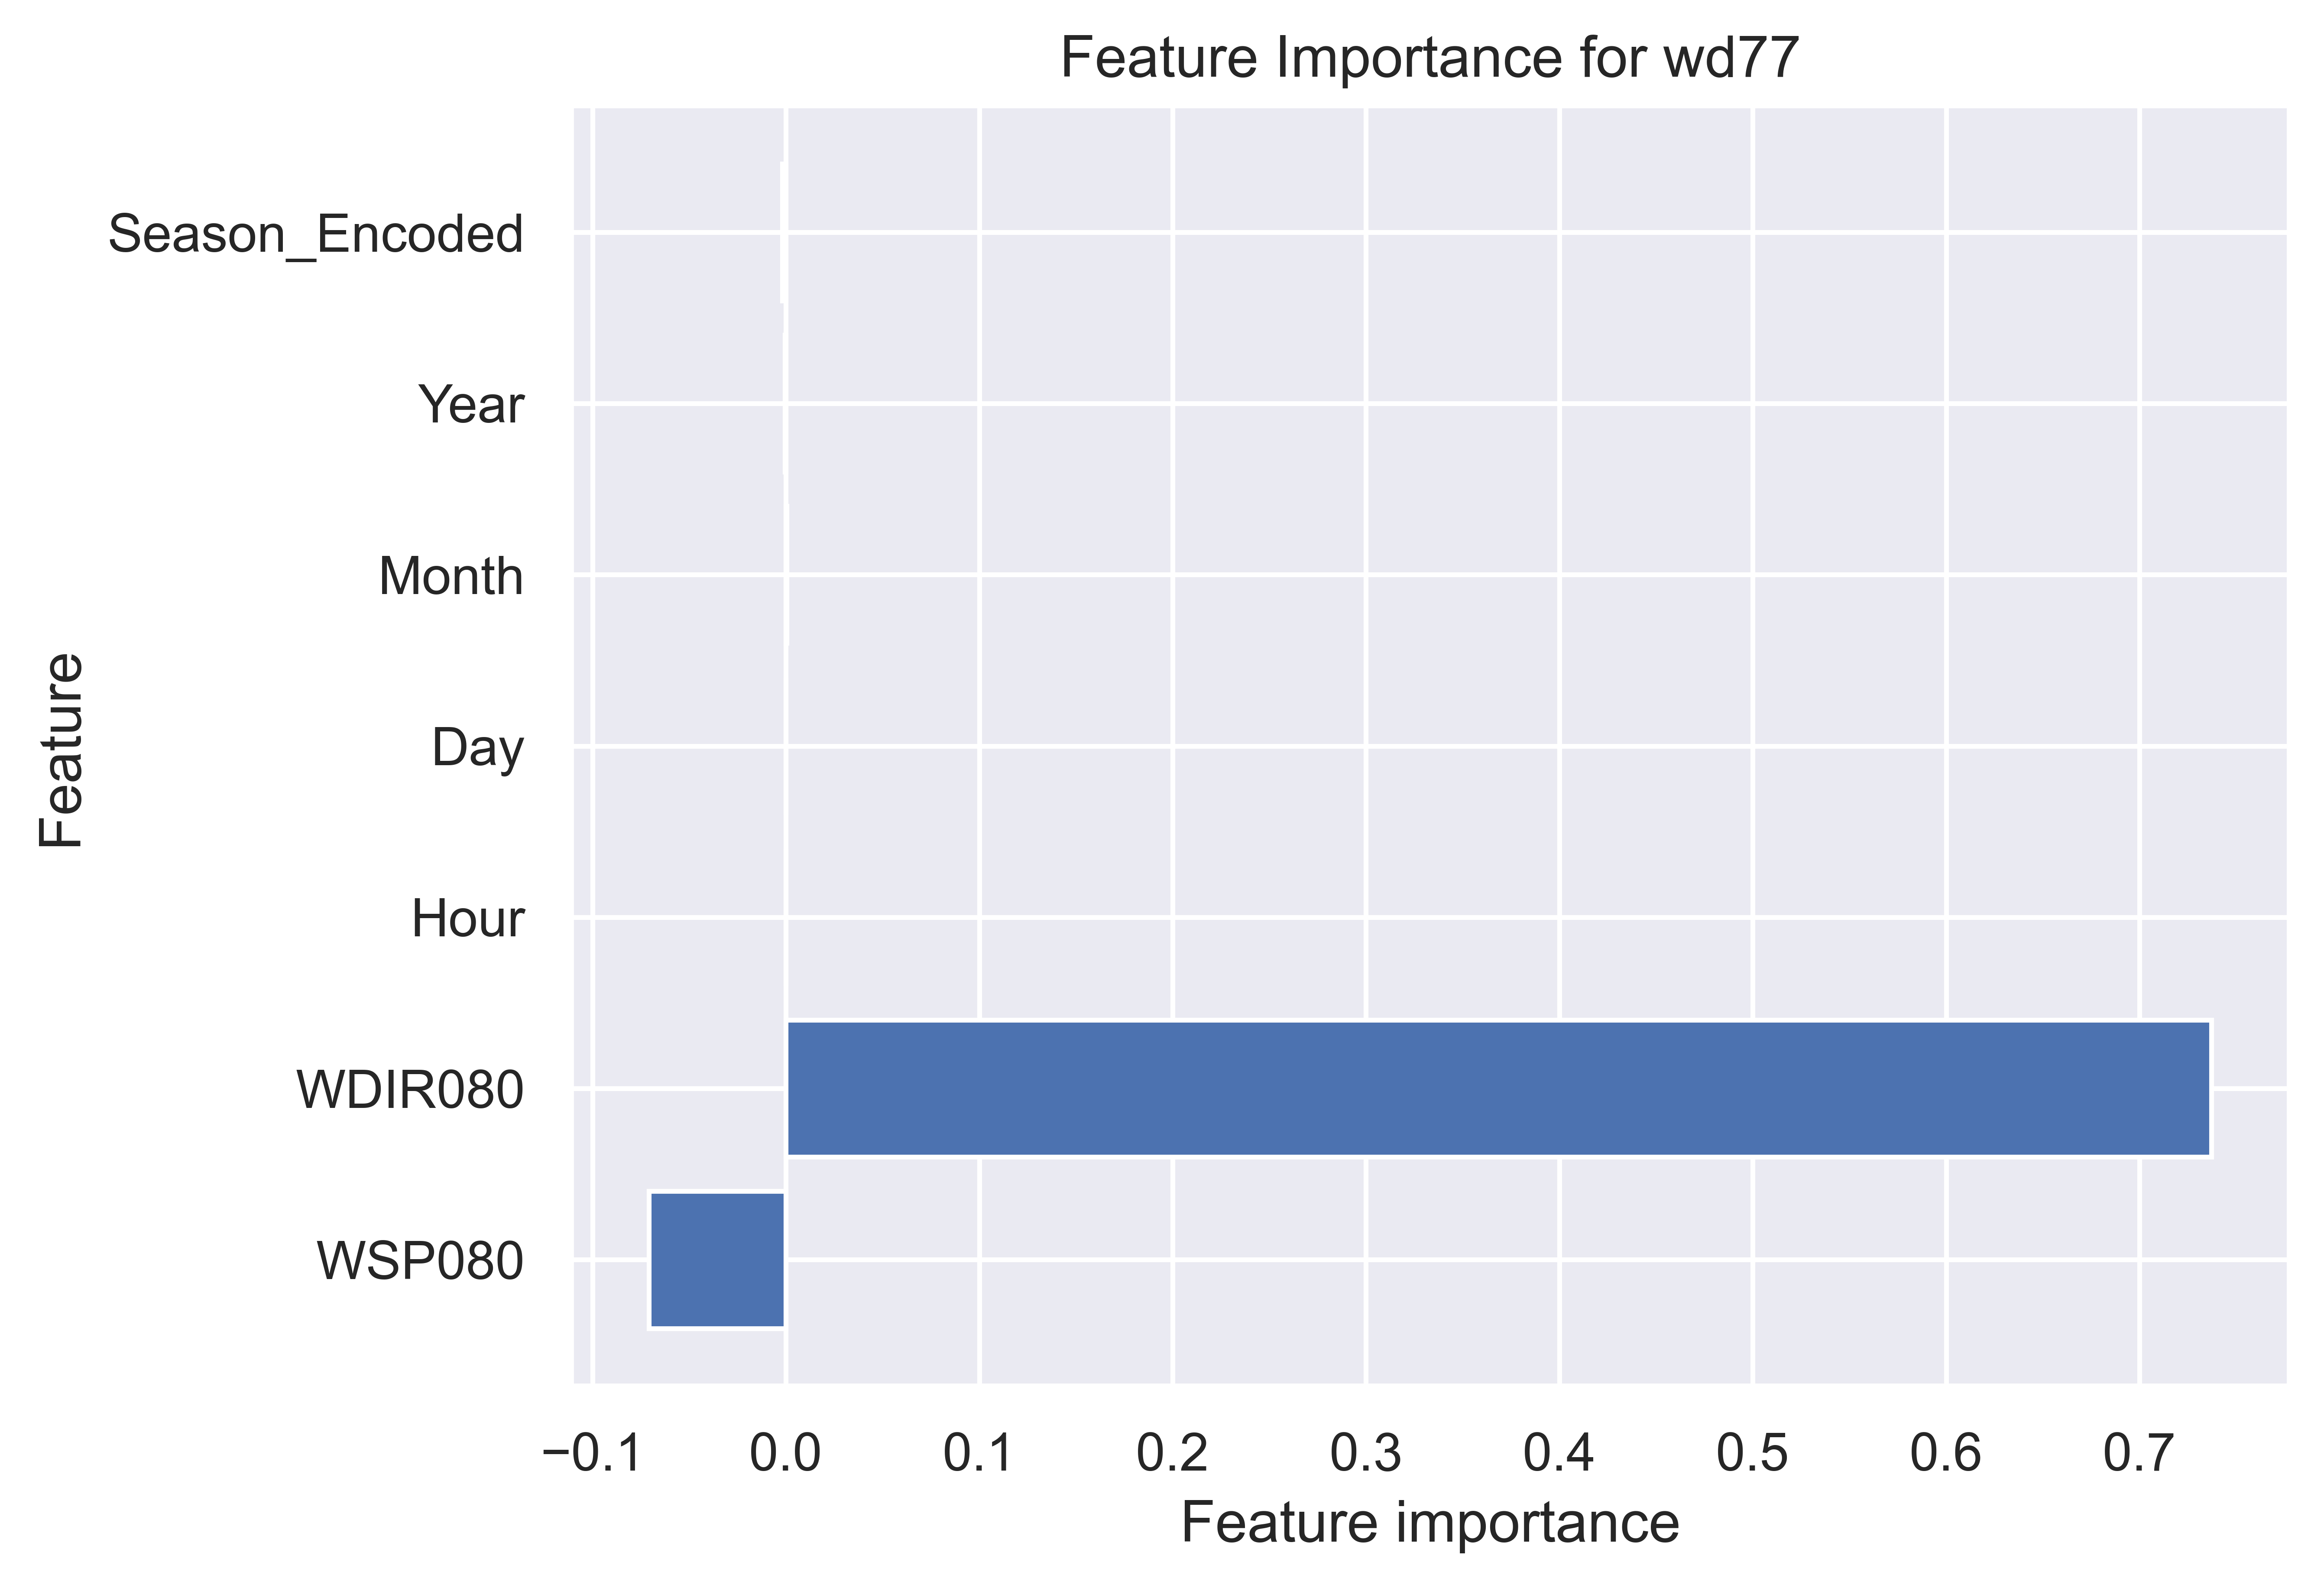

[-7.07889292e-02  7.37230006e-01 -1.34723345e-04 -3.28032457e-06
  4.13086724e-04 -5.11471957e-04 -1.86357644e-03]


In [236]:
for model_name, model in models.items():
    print(f"Intercept for {model_name}: {model.intercept_}")
    
    n_features = len(model.coef_)
    plt.figure(dpi=800)
    plt.barh(range(n_features), model.coef_, align='center')
    plt.yticks(np.arange(n_features), traintest_df[features].columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance for {model_name}")
    plt.show()
    print(model.coef_)

**ws77 grapgh**

The positive significance of WSP080 and the relatively smaller positive significance of WDIR0801 in the wind speed model (ws77) suggest that wind speed has a stronger influence on forecasts than wind direction.

Other features show negligible importance, it means that they do not contribute significantly to the predictions. Therefore, wind speed turns out to be the most influential factor in predicting wind speed, while the influence of wind direction is relatively less. Time features extraction turned out not to contribute to overall result.


**wd77 grapgh**

A negative feature importance for wind speed in the model predicting wind direction suggests an inverse relationship between wind speed and wind direction. In other words, it means that as the wind speed increases, the wind tends to blow in a direction that is opposite or different from the one predicted by the model.
Other features seems not significant for the predictions.


### 3.1.3 Predicted data analysis


#### Creating new df for predicted data


In [237]:
pred_df = pd.DataFrame(index=val_df.index)
pred_df['pred_ws77'] = models['ws77'].predict(val_df[features])
pred_df['pred_wd77'] = models['wd77'].predict(val_df[features])
display(pred_df)

pred_ws77  pred_wd77
2006-01-30 08:00:00   0.197859   0.715891
2006-01-30 09:00:00   0.212790   0.727609
2006-01-30 10:00:00   0.213570   0.738478
2006-01-30 11:00:00   0.214125   0.742140
2006-01-30 12:00:00   0.209669   0.766318
...                        ...        ...
2007-07-15 17:00:00   0.079440   0.725890
2007-07-15 18:00:00   0.049136   0.807033
2007-07-15 19:00:00   0.104941   0.206442
2007-07-15 20:00:00   0.153183   0.229461
2007-07-15 21:00:00   0.125532   0.335283

[12744 rows x 2 columns]

#### Predicted and actual data plots


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

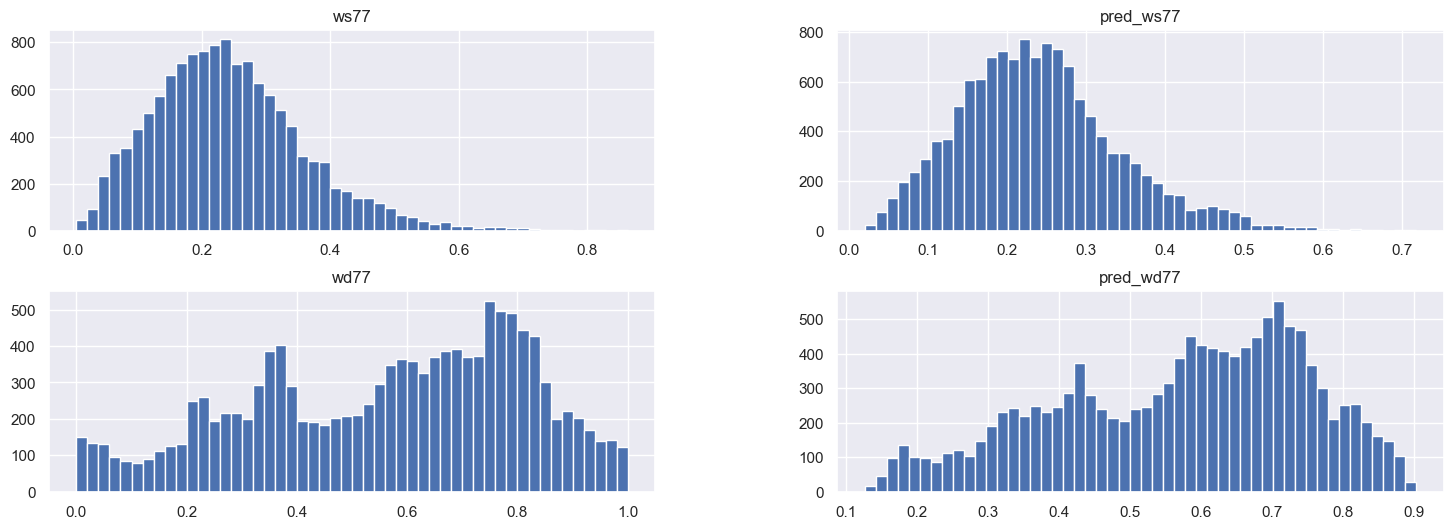

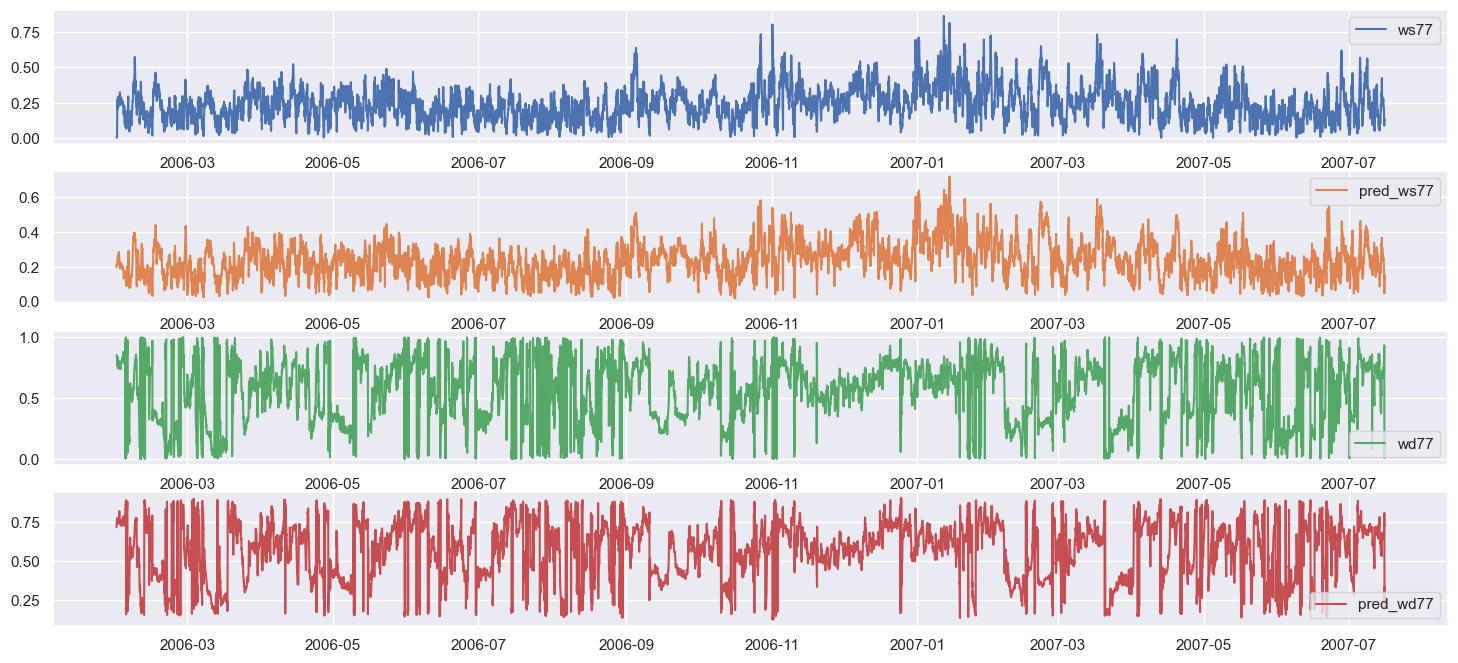

In [238]:
combined_meso_pred_df = pd.concat([val_df[['ws77']], pred_df[['pred_ws77']], val_df[['wd77']], pred_df[['pred_wd77']]], axis=1)
combined_meso_pred_df.hist(bins=50, figsize=(18,6))
combined_meso_pred_df.plot(subplots=True, figsize=(18,8), sharex=False, sharey=False)

In [239]:
display(combined_meso_pred_df.describe())

ws77     pred_ws77          wd77     pred_wd77
count  12744.000000  12744.000000  1.274400e+04  12744.000000
mean       0.241947      0.239607  5.628337e-01      0.569800
std        0.117510      0.100905  2.483554e-01      0.178405
min        0.004635      0.019911  1.128574e-07      0.126726
25%        0.158239      0.168781  3.619528e-01      0.430787
50%        0.230376      0.231131  6.046306e-01      0.598654
75%        0.309421      0.296166  7.666721e-01      0.711094
max        0.863391      0.718023  1.000000e+00      0.902735

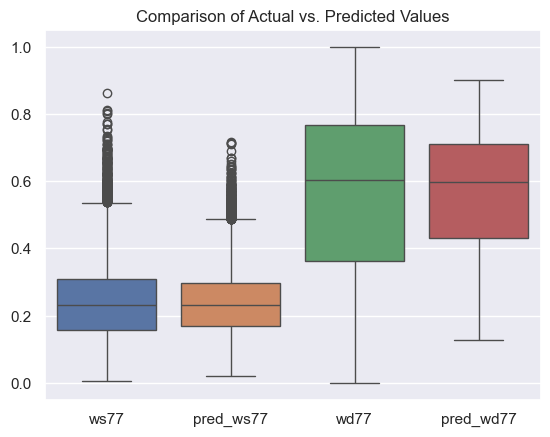

In [240]:
sns.boxplot(combined_meso_pred_df)
plt.title('Comparison of Actual vs. Predicted Values')
plt.show()

#### T-statistic and P-value for wind speed and direction


In [241]:
actual_ws77 = val_df['ws77']
actual_wd77 = val_df['wd77']

predicted_ws77 = combined_meso_pred_df['pred_ws77']
predicted_wd77 = combined_meso_pred_df['pred_wd77']

t_statistic_ws77, p_value_ws77 = stats.ttest_rel(actual_wd77, actual_ws77)

t_statistic_wd77, p_value_wd77 = stats.ttest_rel(predicted_wd77, predicted_ws77)

print("T-statistic for actual wd77 vs ws77:", t_statistic_ws77)
print("P-value for actual wd77 vs ws77:", p_value_ws77)

print("T-statistic for predicted wd77 vs ws77:", t_statistic_wd77)
print("P-value for predicted wd77 vs ws77:", p_value_wd77)

T-statistic for actual wd77 vs ws77: 137.9296645142709
P-value for actual wd77 vs ws77: 0.0
T-statistic for predicted wd77 vs ws77: 187.63781580189925
P-value for predicted wd77 vs ws77: 0.0


Both for the actual and predicted data, the p-values are extremely low (approaching zero), suggesting strong evidence against the null hypothesis that there is no difference between wind direction and wind speed. In other words, wind direction has an influence on the wind speed.

The positive t-statistics suggest that, on average, wind direction is significantly different from wind speed.
Larger t-statistics for predicted values means that there is a larger relative difference compared to the variability within each group, compared to the actual values.

#### Weibull distribution for wind speed


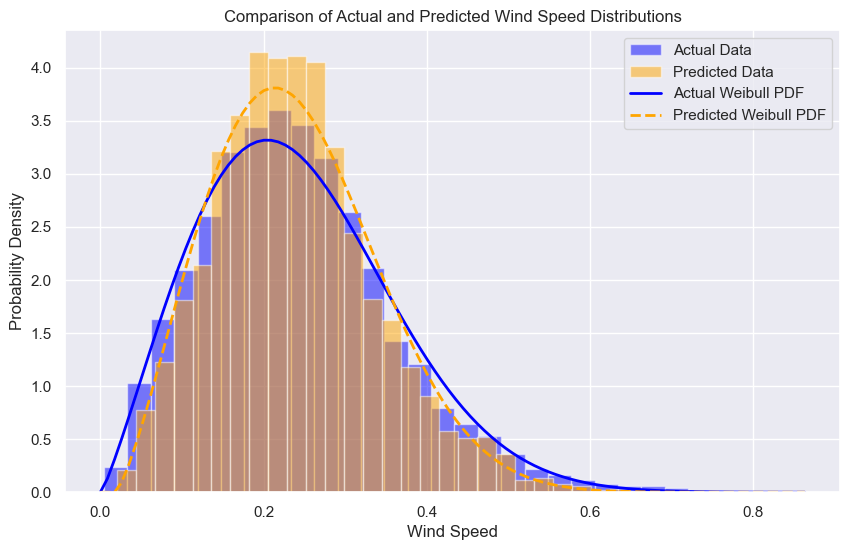

In [242]:
actual_params = weibull_min.fit(val_df['ws77'], loc=0)

predicted_params = weibull_min.fit(predicted_ws77, loc=0)

# wind speed values for plotting PDF
x = np.linspace(0, max(val_df['ws77'].max(), predicted_ws77.max()), 100)

# PDF values for actual and predicted Weibull distributions
actual_pdf = weibull_min.pdf(x, *actual_params)
predicted_pdf = weibull_min.pdf(x, *predicted_params)

plt.figure(figsize=(10, 6))
plt.hist(val_df['ws77'], bins=30, density=True, alpha=0.5, color='blue', label='Actual Data')
plt.hist(predicted_ws77, bins=30, density=True, alpha=0.5, color='orange', label='Predicted Data')
plt.plot(x, actual_pdf, color='blue', linestyle='-', linewidth=2, label='Actual Weibull PDF')
plt.plot(x, predicted_pdf, color='orange', linestyle='--', linewidth=2, label='Predicted Weibull PDF')

plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Comparison of Actual and Predicted Wind Speed Distributions')
plt.legend()
plt.grid(True)
plt.show()

In [243]:
actual_A, actual_k = actual_params[0], actual_params[2]
predicted_A, predicted_k = predicted_params[0], predicted_params[2]
error_in_A = abs(predicted_A - actual_A)
error_in_k = abs(predicted_k - actual_k)

print(f"Actual_A: {actual_A}")
print(f"Predicted_A: {predicted_A}\n")

print(f"Actual_k: {actual_k}")
print(f"Predicted_k: {predicted_k}\n")

print(f"Error-in-A: {error_in_A}")
print(f"Error-in-k: {error_in_k}")

Actual_A: 2.1536604757040125
Predicted_A: 2.309783245372519

Actual_k: 0.27196244480454557
Predicted_k: 0.24926837026894422

Error-in-A: 0.15612276966850658
Error-in-k: 0.02269407453560135


The scale parameter (A) of the predicted Weibull distribution closely matches the scale parameter of the actual distribution, with a relatively small error (0.156).

Similarly, the shape parameter (k) of the predicted Weibull distribution is reasonably close to the shape parameter of the actual distribution, showing a minor discrepancy (0.0227).

Overall, the predicted Weibull distribution appears to be a reasonable approximation of the actual distribution of wind speed data. The errors in both scale and shape parameters suggest that the prediction captures the essential characteristics of the data distribution.

## 3.2 Polynomial regression model


### 3.2.0 Splitting data


In [244]:
def split_data(X, y, test_size=0.2, random_state=42):
    """Split data into train and test sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=traintest_df[['Season_Encoded']])
    return X_train, X_test, y_train, y_test

features = ['WSP080', 'WDIR080', 'Hour', 'Day', 'Month', 'Year', 'Season_Encoded']
target_variables = ['ws77', 'wd77']

### 3.2.1 Model development


In [245]:
models = {}
train_predictions = {}
test_predictions = {}
actual_values = {}
pred_poly_df = pd.DataFrame(index=val_df.index)

for target in target_variables:
    print(f"Predicting Target Variable: {target}")
    
    X_train, X_test, y_train, y_test = split_data(traintest_df[features], traintest_df[target])
    
    polynomial_regression = Pipeline([
        ('poly', PolynomialFeatures()),
        ('reg', LinearRegression())
    ])
    
    # Perform hyperparameter tuning using GridSearchCV
    param_grid = {'poly__degree': [2,6]}
    grid_search = GridSearchCV(estimator=polynomial_regression, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    best_model.fit(X_train, y_train)

    models[target] = best_model
    
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)

    train_predictions[target] = train_pred
    test_predictions[target] = test_pred
    actual_values[target] = {'train': y_train, 'test': y_test}

    pred_poly_df['pred_' + target] = best_model.predict(val_df[features]) # Used in 3.2.3 for prediction data analysis.

Predicting Target Variable: ws77
Predicting Target Variable: wd77


Maximum degree of polynomial was set to 6, beacause of computaiton time.

### 3.2.2 Model evaluation


In [246]:
train_metrics = {}
test_metrics = {}

for target in target_variables:
    print(f"Target: {target}")  
    train_mse = mean_squared_error(actual_values[target]['train'], train_predictions[target])
    train_r2 = r2_score(actual_values[target]['train'], train_predictions[target])
    test_mse = mean_squared_error(actual_values[target]['test'], test_predictions[target])
    test_r2 = r2_score(actual_values[target]['test'], test_predictions[target])
    
    train_metrics[target] = {'MSE': train_mse, 'R^2': train_r2}
    test_metrics[target] = {'MSE': test_mse, 'R^2': test_r2}
    
    print(f"Best degree: {models[target].named_steps['poly'].degree}")

    print(f"Train MSE: {train_mse:.4f}, Train R^2: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R^2: {test_r2:.4f}")
    print("--------------------")

Target: ws77
Best degree: 6
Train MSE: 0.0031, Train R^2: 0.7646
Test MSE: 0.0031, Test R^2: 0.7561
--------------------
Target: wd77
Best degree: 6
Train MSE: 0.0222, Train R^2: 0.6547
Test MSE: 0.0236, Test R^2: 0.6380
--------------------


There is no significant difference between the train and the r^2 test, so the model does not overfit, as in linear regression model. A score >= 0.75 for the ws77 variable means that the polynomial regression did a similarly good job of predicting wind speed, as linear regression model.
However, the result of ~0.63 for wind direction is worse then wind speed, as expected from the exploratory analysis of the data.
However, compared to linear regression, which scored ~0.52, polynomial regression improved significantly.
Charts below shows how score increases when we set degree of polynomial higher, at the cost of increasing computational time (time that was needed to run a cell in 3.2.1 subpoint).


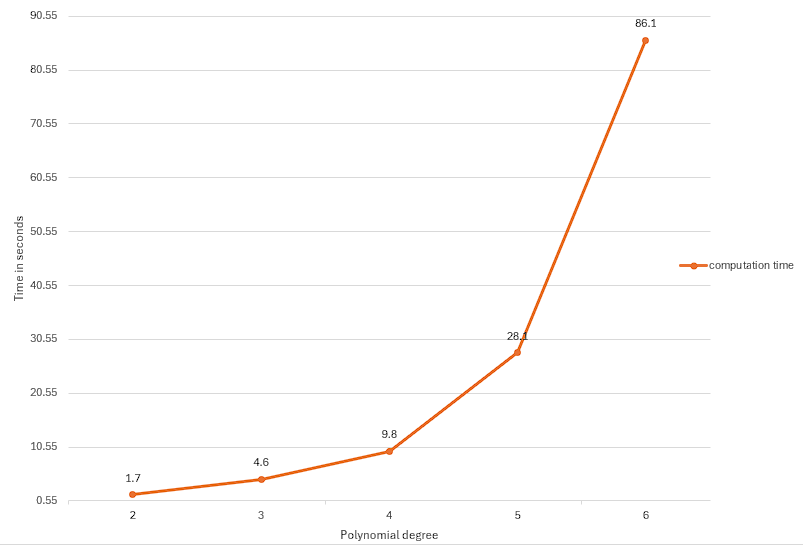 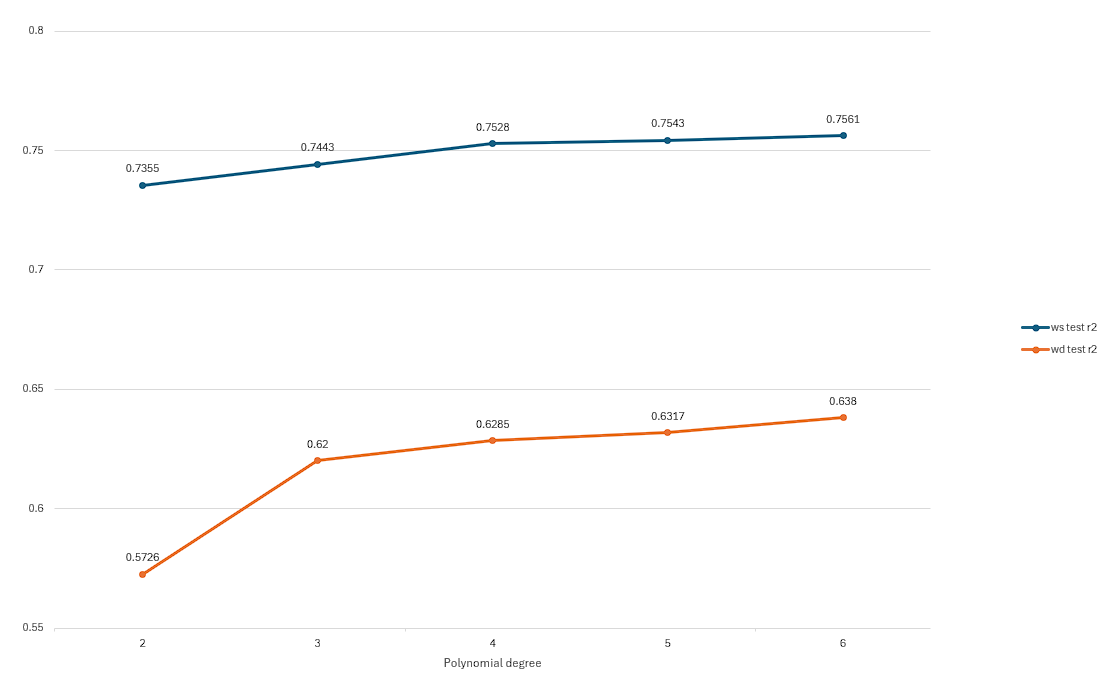

### 3.2.3 Predicted data analysis


#### Predicted and actual data plots


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

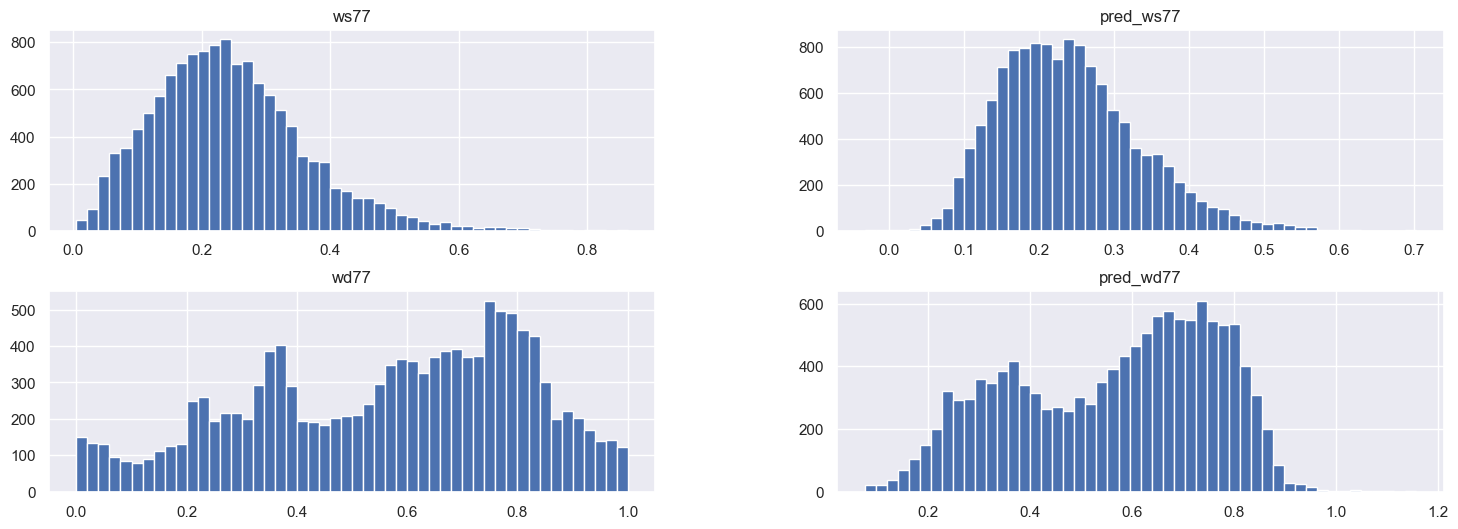

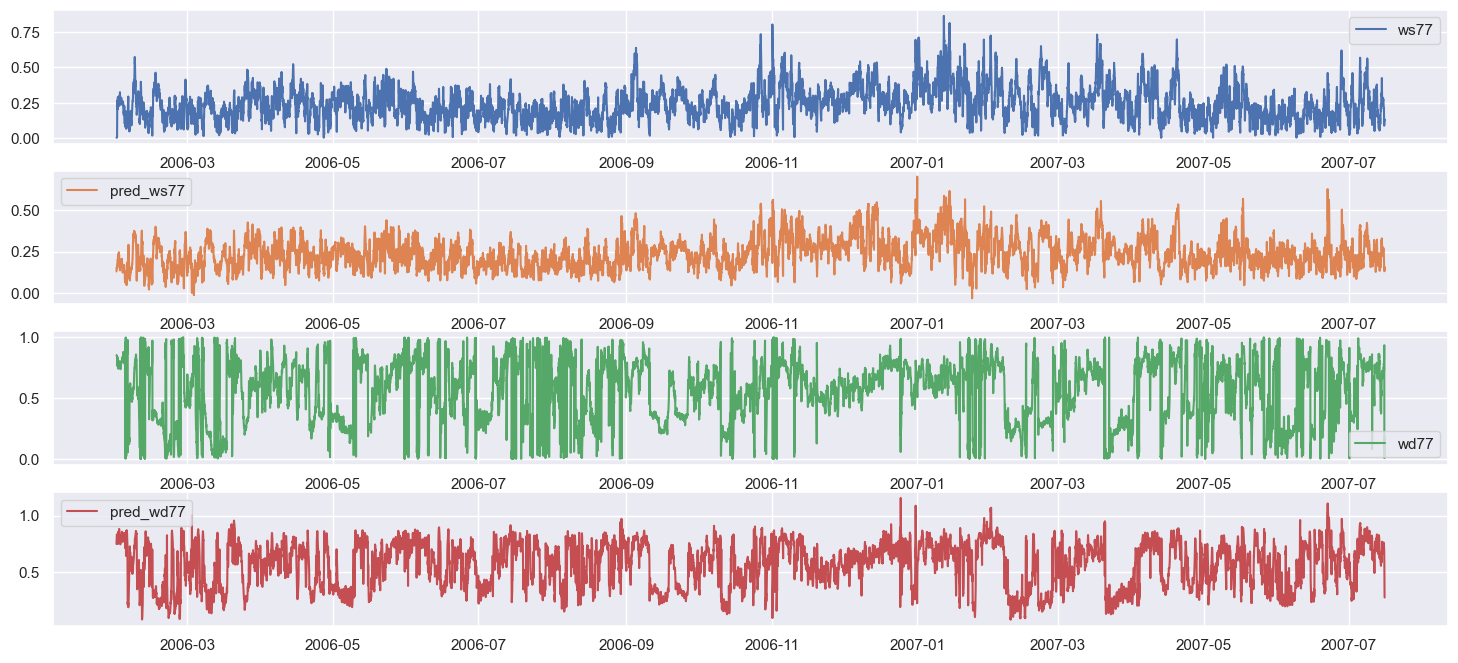

In [247]:
combined_meso_pred_poly_df = pd.concat([val_df[['ws77']], pred_poly_df[['pred_ws77']], val_df[['wd77']], pred_poly_df[['pred_wd77']]], axis=1)
combined_meso_pred_poly_df.hist(bins=50, figsize=(18,6))
combined_meso_pred_poly_df.plot(subplots=True, figsize=(18,8), sharex=False, sharey=False)

In [248]:
display(combined_meso_pred_poly_df.describe())

ws77     pred_ws77          wd77     pred_wd77
count  12744.000000  12744.000000  1.274400e+04  12744.000000
mean       0.241947      0.240115  5.628337e-01      0.563876
std        0.117510      0.091605  2.483554e-01      0.198455
min        0.004635     -0.031579  1.128574e-07      0.075610
25%        0.158239      0.172184  3.619528e-01      0.387986
50%        0.230376      0.230895  6.046306e-01      0.602256
75%        0.309421      0.294392  7.666721e-01      0.729258
max        0.863391      0.703193  1.000000e+00      1.157157

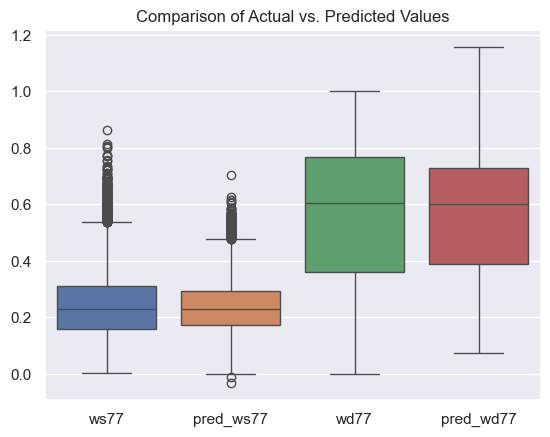

In [249]:
sns.boxplot(combined_meso_pred_poly_df)
plt.title('Comparison of Actual vs. Predicted Values')
plt.show()

#### T-statistic and P-value for wind speed and direction


In [250]:
actual_ws77 = val_df['ws77']
actual_wd77 = val_df['wd77']

predicted_ws77 = combined_meso_pred_poly_df['pred_ws77']
predicted_wd77 = combined_meso_pred_poly_df['pred_wd77']

t_statistic_ws77, p_value_ws77 = stats.ttest_rel(actual_wd77, actual_ws77)

t_statistic_wd77, p_value_wd77 = stats.ttest_rel(predicted_wd77, predicted_ws77)

print("T-statistic for actual wd77 vs ws77:", t_statistic_ws77)
print("P-value for actual wd77 vs ws77:", p_value_ws77)

print("T-statistic for predicted wd77 vs ws77:", t_statistic_wd77)
print("P-value for predicted wd77 vs ws77:", p_value_wd77)

T-statistic for actual wd77 vs ws77: 137.9296645142709
P-value for actual wd77 vs ws77: 0.0
T-statistic for predicted wd77 vs ws77: 174.5993159188722
P-value for predicted wd77 vs ws77: 0.0


Values and conclusion are similar to p-value and t-statistics described for linear regression model above.

However, T-statistic for predicted wd77 vs ws77 was 187.6 for linear model and 174.6 for polynomial regression, which means predicted value for wind direction in polynomial model are on average lower then in linear model.

#### Weibull distribution for wind speed


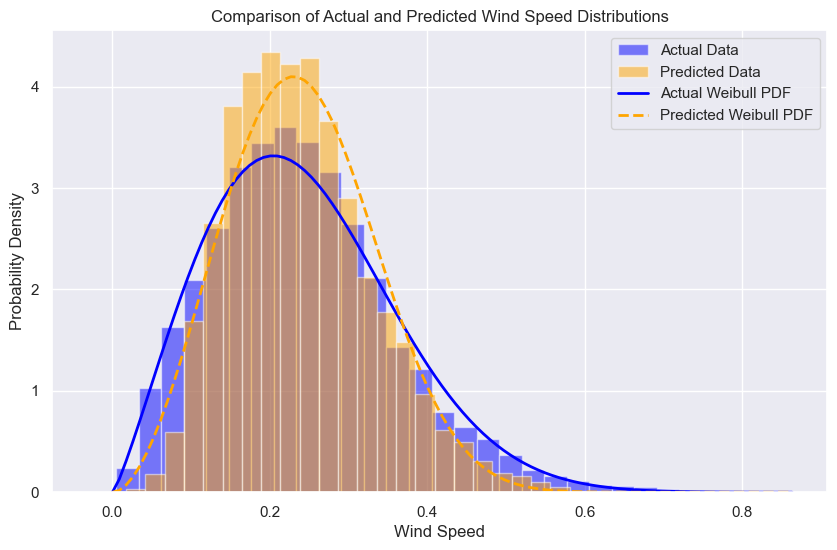

In [251]:
actual_params = weibull_min.fit(val_df['ws77'], loc=0)
predicted_params = weibull_min.fit(predicted_ws77, loc=0)

x = np.linspace(0, max(val_df['ws77'].max(), predicted_ws77.max()), 100)

actual_pdf = weibull_min.pdf(x, *actual_params)
predicted_pdf = weibull_min.pdf(x, *predicted_params)

plt.figure(figsize=(10, 6))
plt.hist(val_df['ws77'], bins=30, density=True, alpha=0.5, color='blue', label='Actual Data')
plt.hist(predicted_ws77, bins=30, density=True, alpha=0.5, color='orange', label='Predicted Data')
plt.plot(x, actual_pdf, color='blue', linestyle='-', linewidth=2, label='Actual Weibull PDF')
plt.plot(x, predicted_pdf, color='orange', linestyle='--', linewidth=2, label='Predicted Weibull PDF')

plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Comparison of Actual and Predicted Wind Speed Distributions')
plt.legend()
plt.grid(True)
plt.show()

In [252]:
# A and k parameters for actual data
actual_A, actual_k = actual_params[0], actual_params[2]
# A and k parameters for predicted data
predicted_A, predicted_k = predicted_params[0], predicted_params[2]

error_in_A = abs(predicted_A - actual_A)
error_in_k = abs(predicted_k - actual_k)

print(f"Actual_A: {actual_A}")
print(f"Predicted_A: {predicted_A}\n")

print(f"Actual_k: {actual_k}")
print(f"Predicted_k: {predicted_k}\n")

print(f"Error-in-A: {error_in_A}")
print(f"Error-in-k: {error_in_k}")

Actual_A: 2.1536604757040125
Predicted_A: 2.78174837030007

Actual_k: 0.27196244480454557
Predicted_k: 0.26889871147504685

Error-in-A: 0.6280878945960575
Error-in-k: 0.003063733329498719


The scale parameter (A) of the predicted Weibull distribution is higher than the actual distribution, with a noticeable error of 0.6281. This indicates a moderate discrepancy in estimating the scale of the distribution of actual and predicted values.

The shape parameter (k) is slightly smaller than the shape parameter of the actual distribution, suggesting that the shape estimation closely matches the actual data, showing good fit on the shape of the distribution.